## Collect all the images

In [1]:
# Where to take the images from.
root_image_path = '_old/images'

In [2]:
from pathlib import Path
import re
from typing import Tuple

bad_combos = [
    (1, 0.25),
    (2, 2),
    (1, 2),
    (2, 1),
    (2, 0.5),
    (1, 1),
    (0.125, 1),
    (2, 0.25),
    (0.5, 2),
    (0.5, 0.125),
]


def epoch_of_image(img_path: Path):
    m = re.search(r'image_at_epoch_(\d+)\.png', str(img_path))
    r = int(m.group(1))
    return r

def get_vae_params(vae_path: Path) -> Tuple[float, float]:
    m = re.search(r'beta-([0-9.]+)', str(vae_path))
    beta = float(m.group(1))    
    m = re.search(r'gamma-([0-9.]+)', str(vae_path))
    gamma = float(m.group(1))
    return beta, gamma


def vae_filter(vae: Path) -> bool:
    (beta, gamma) = get_vae_params(vae)
    if gamma in [4, 8]:
        return False
    if beta in [4, 8]:
        return False
    
    if (beta, gamma) in bad_combos:
        return False
    
    return True


vaes = [d for d in Path(root_image_path).resolve().iterdir() if d.is_dir() and vae_filter(d)]

vae_imgs = []

for v in vaes:
    epoch = max([epoch_of_image(img) for img in v.iterdir()])
    chosen = v / f'image_at_epoch_{epoch}.png'
    vae_imgs.append(chosen)


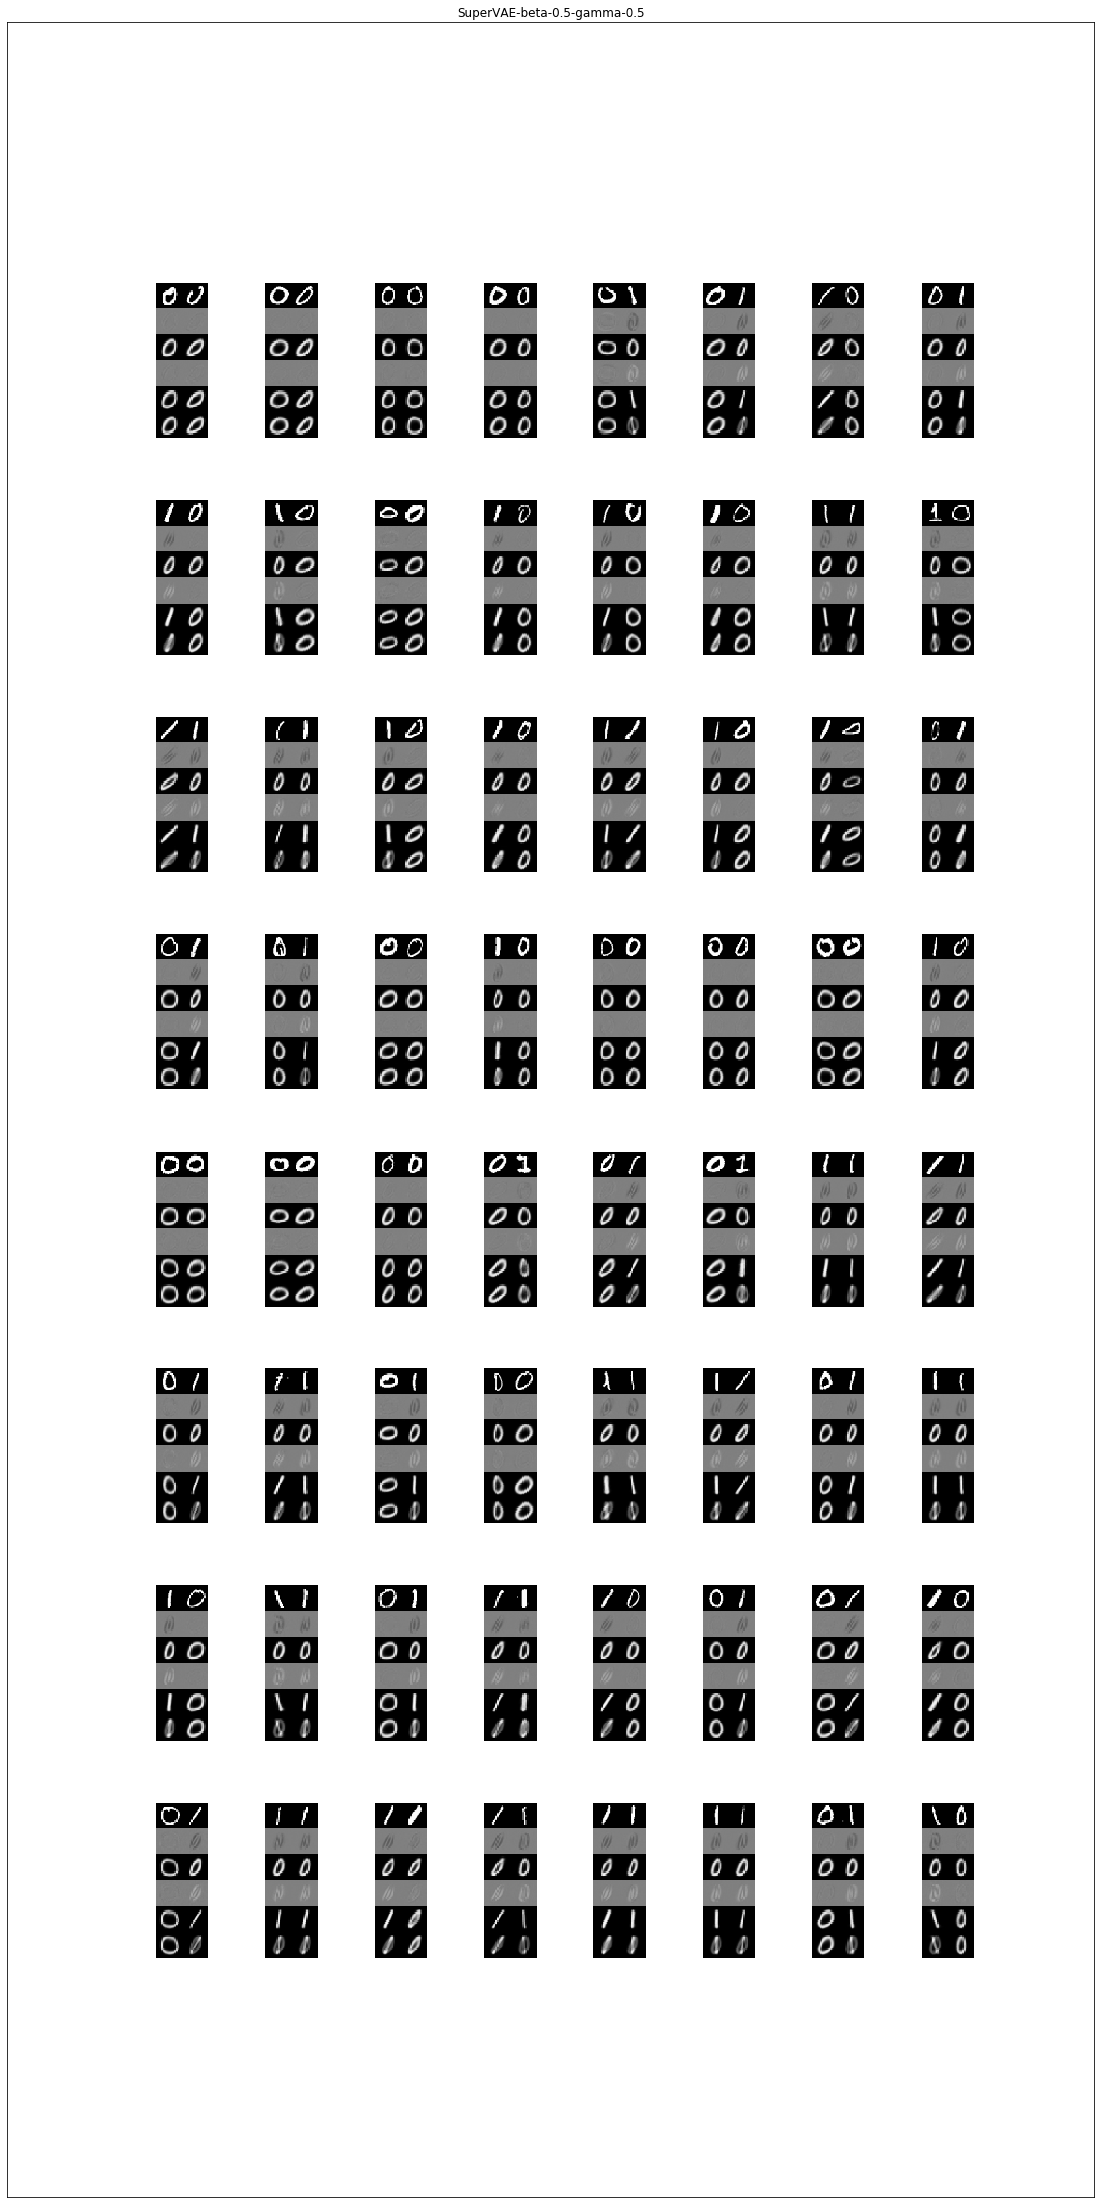

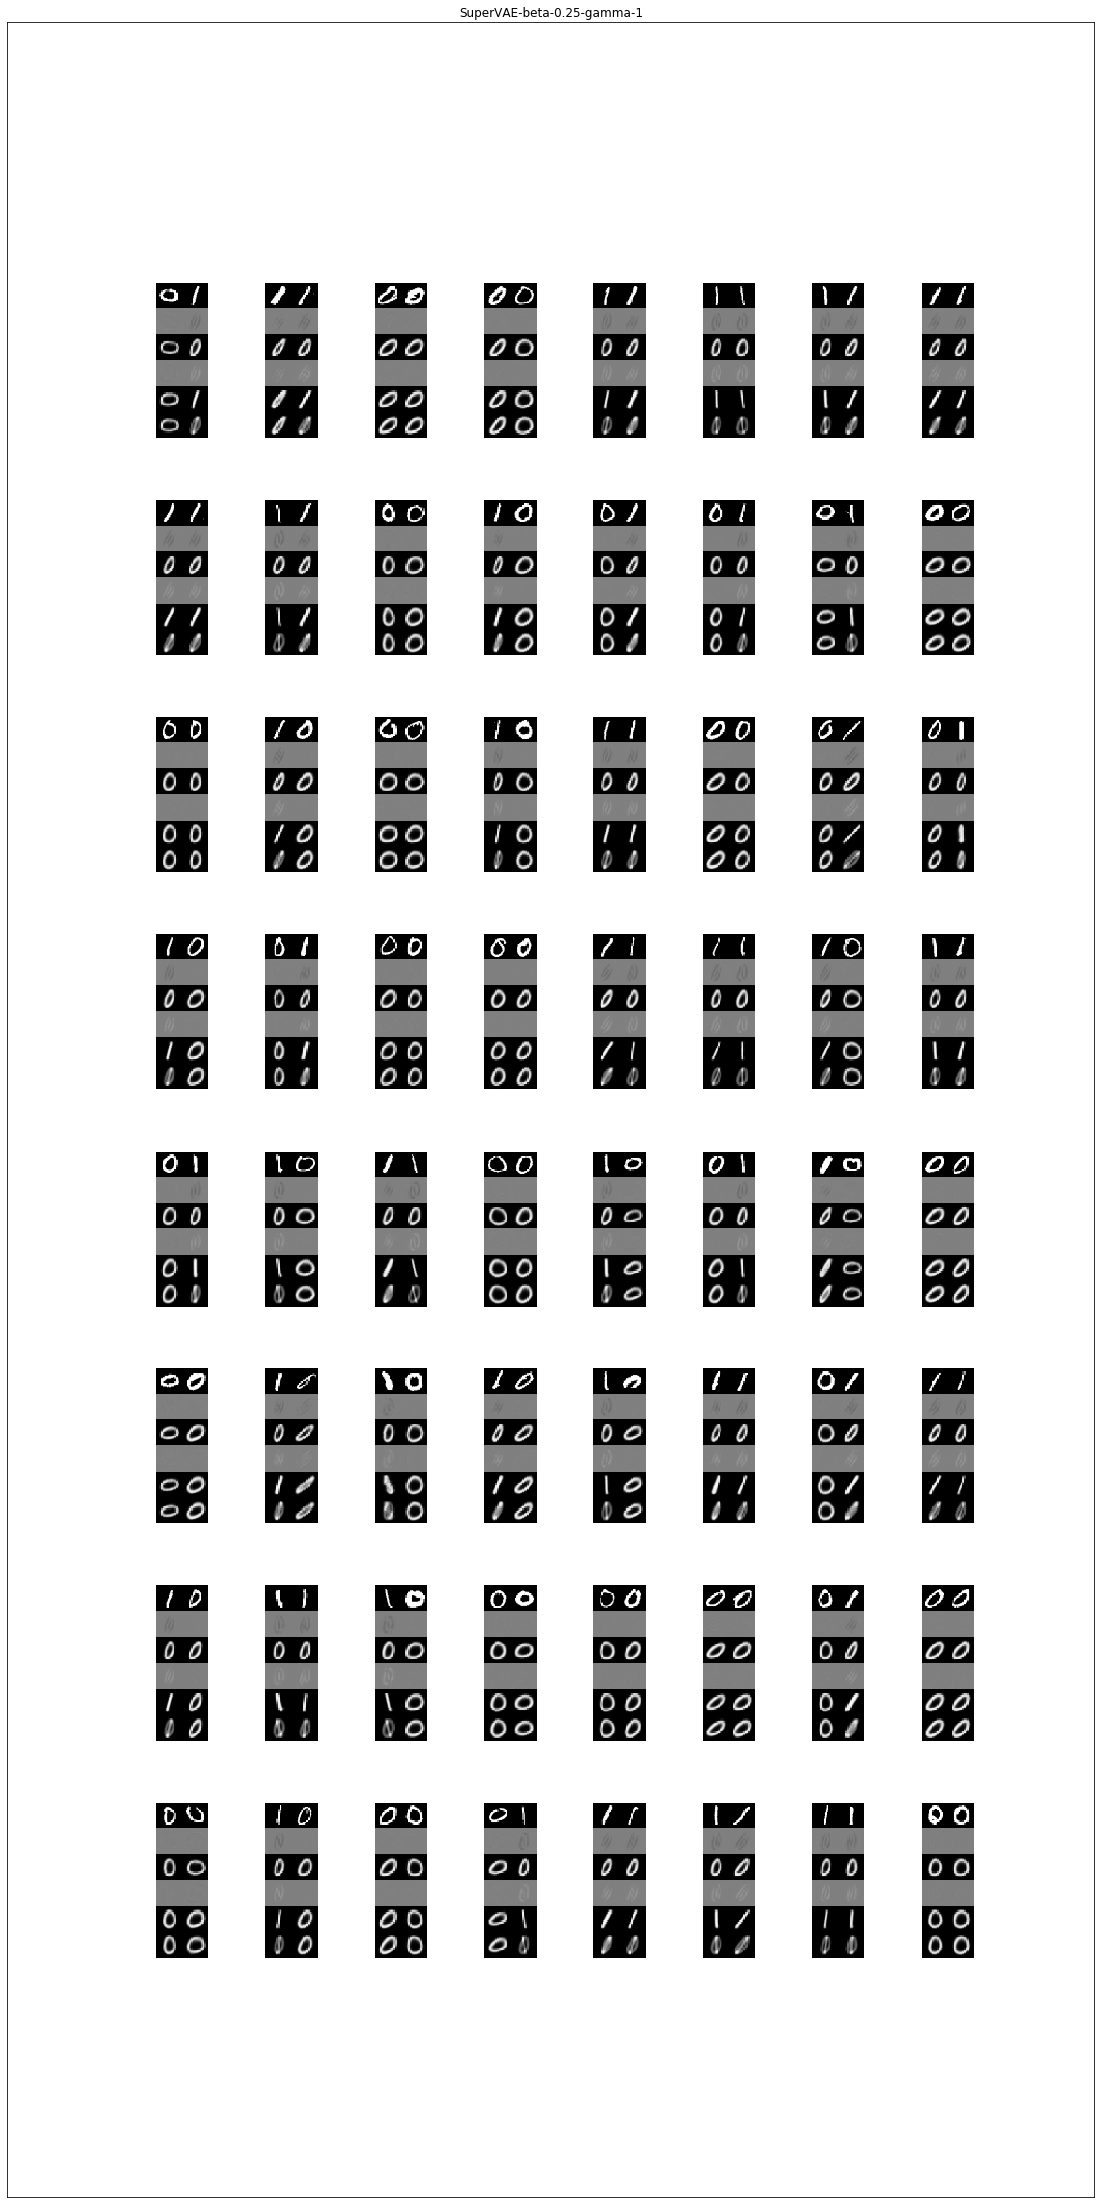

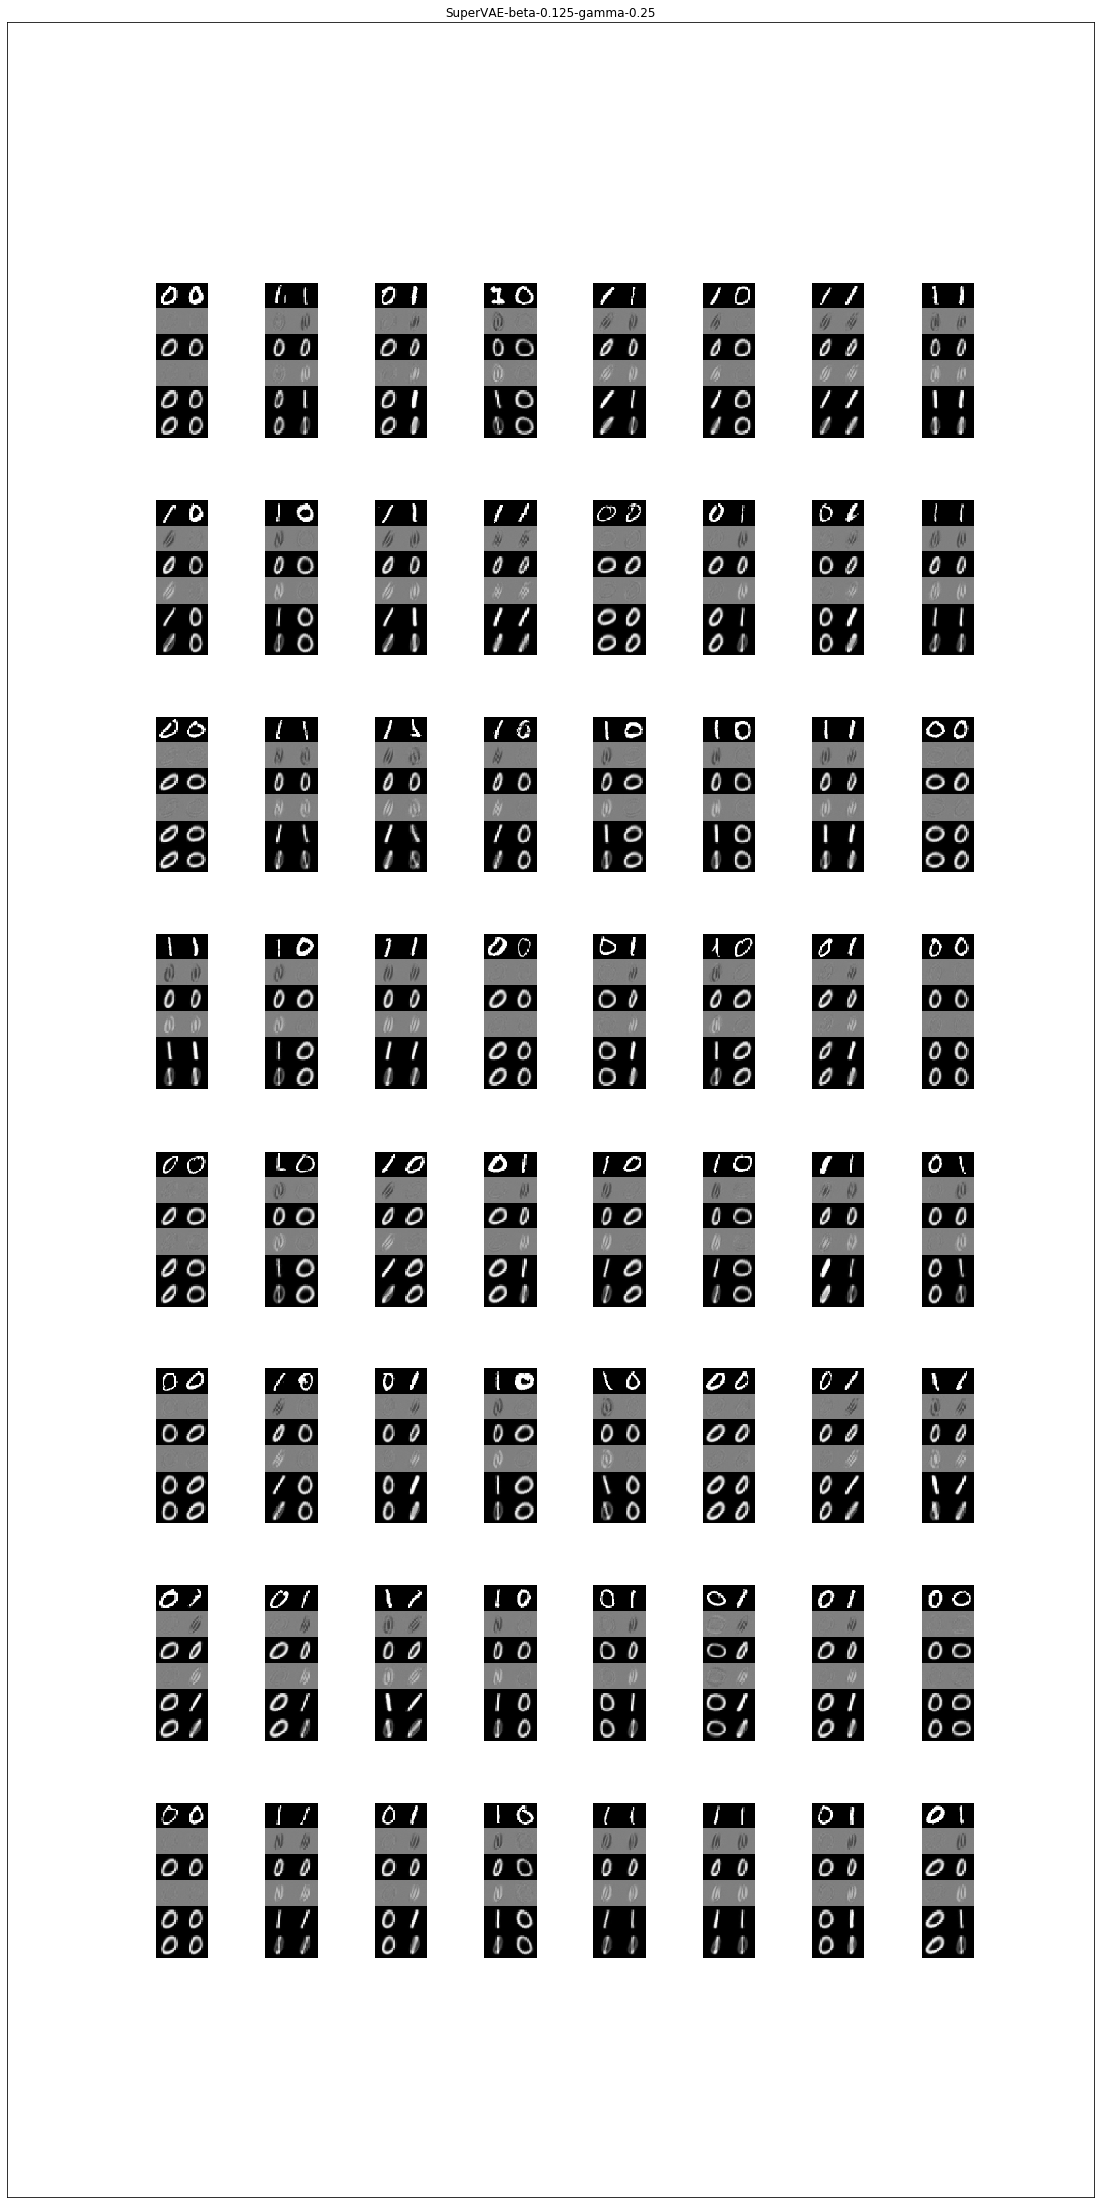

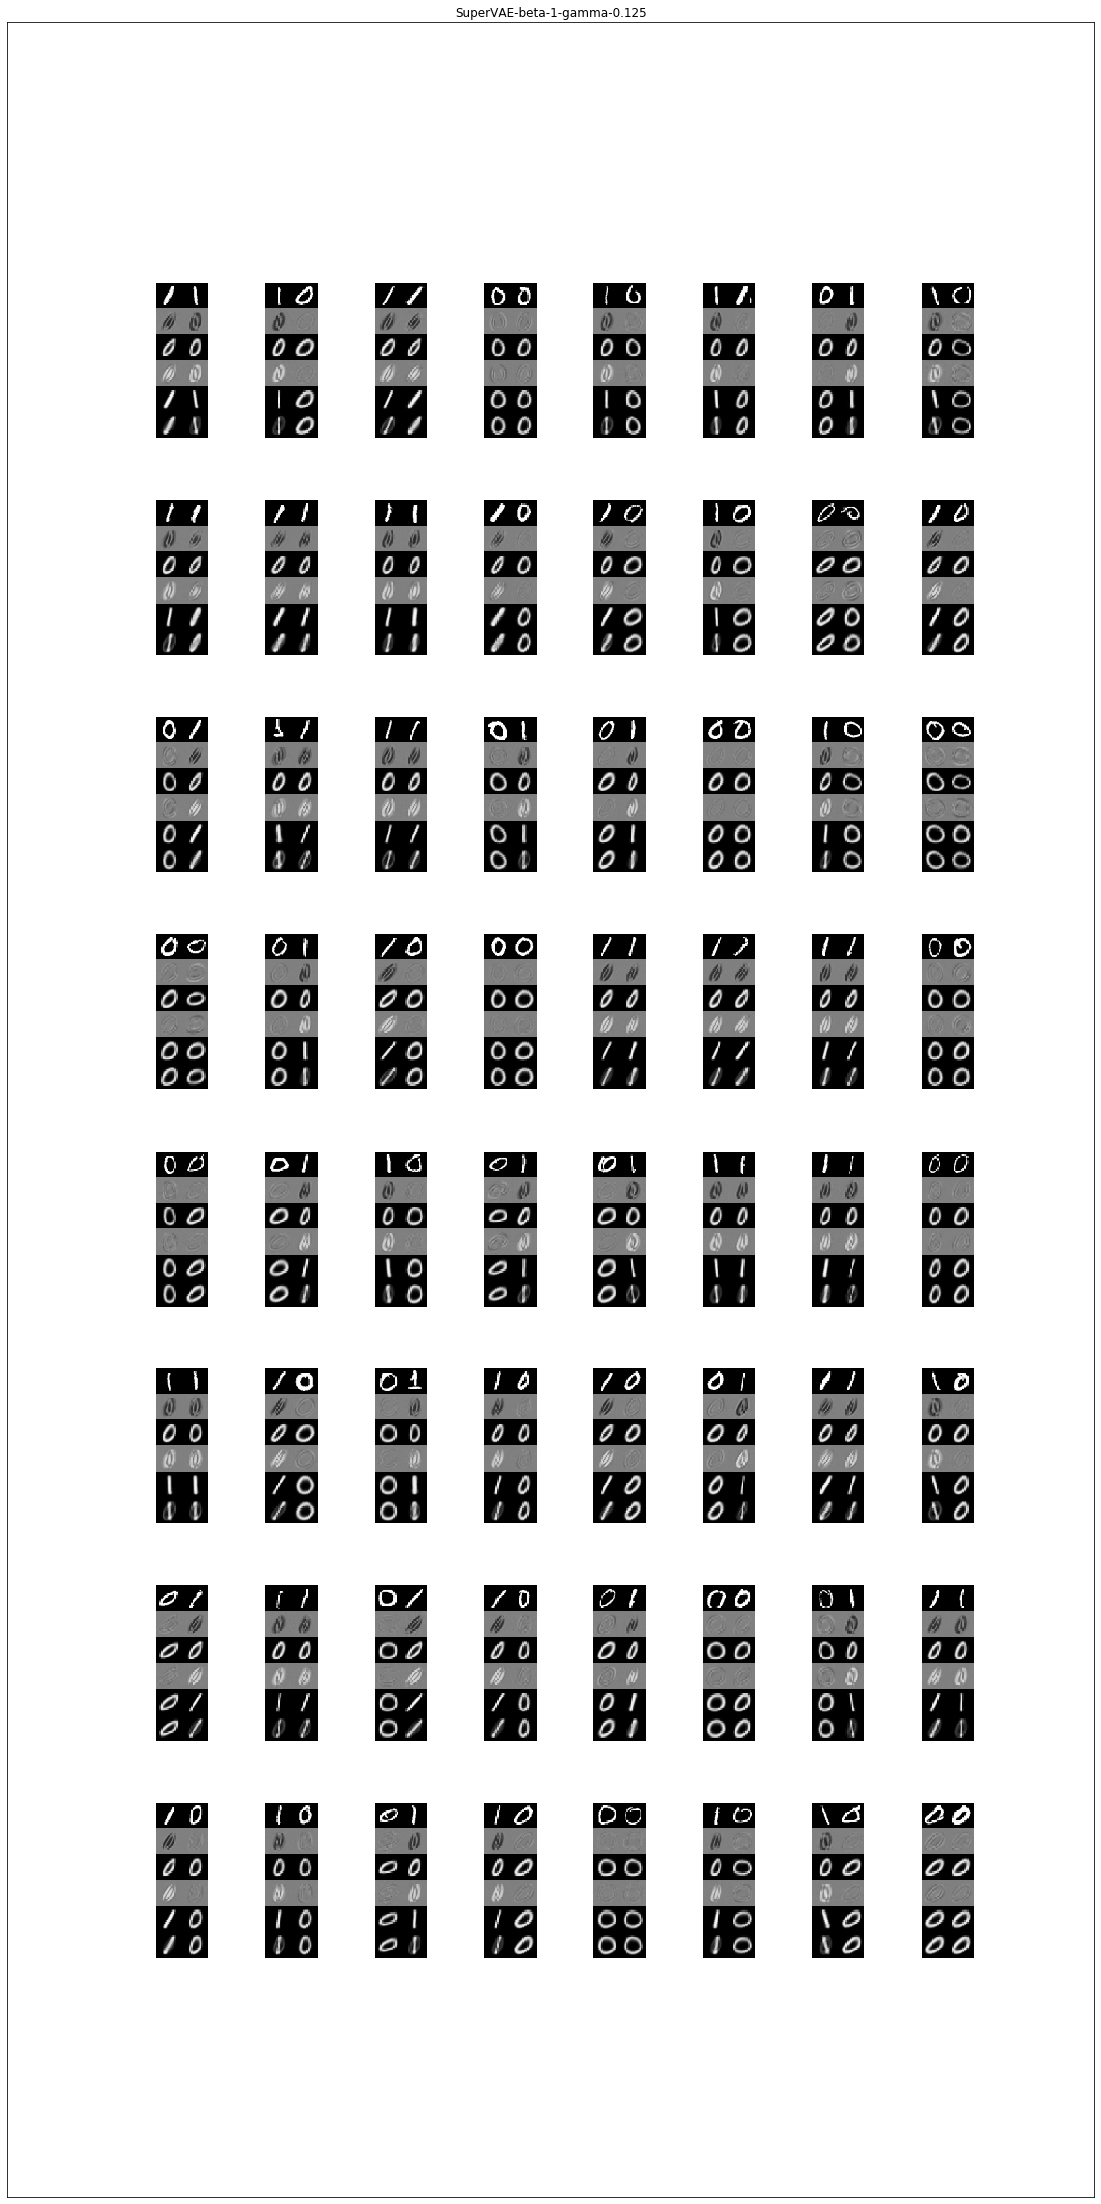

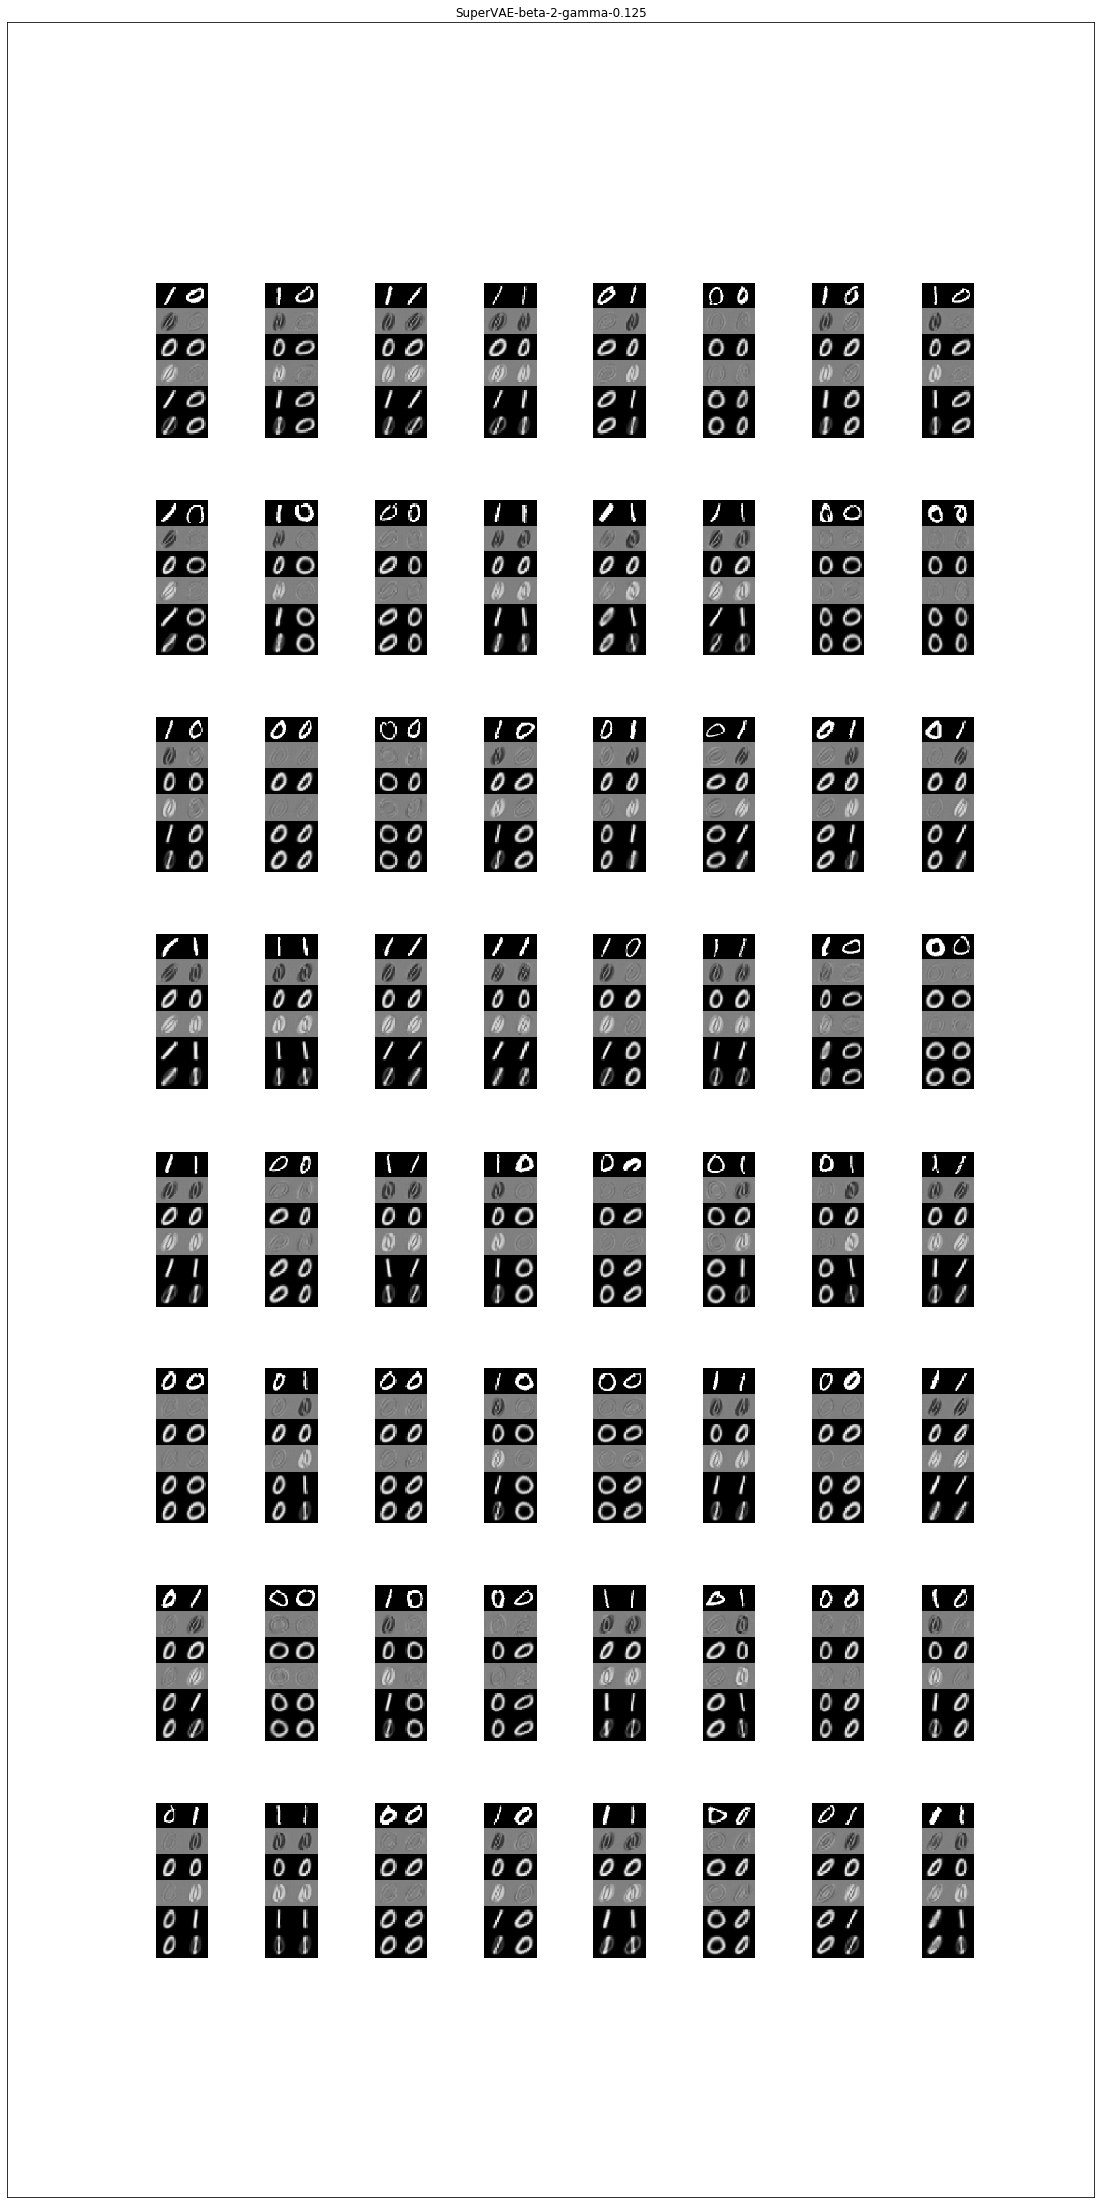

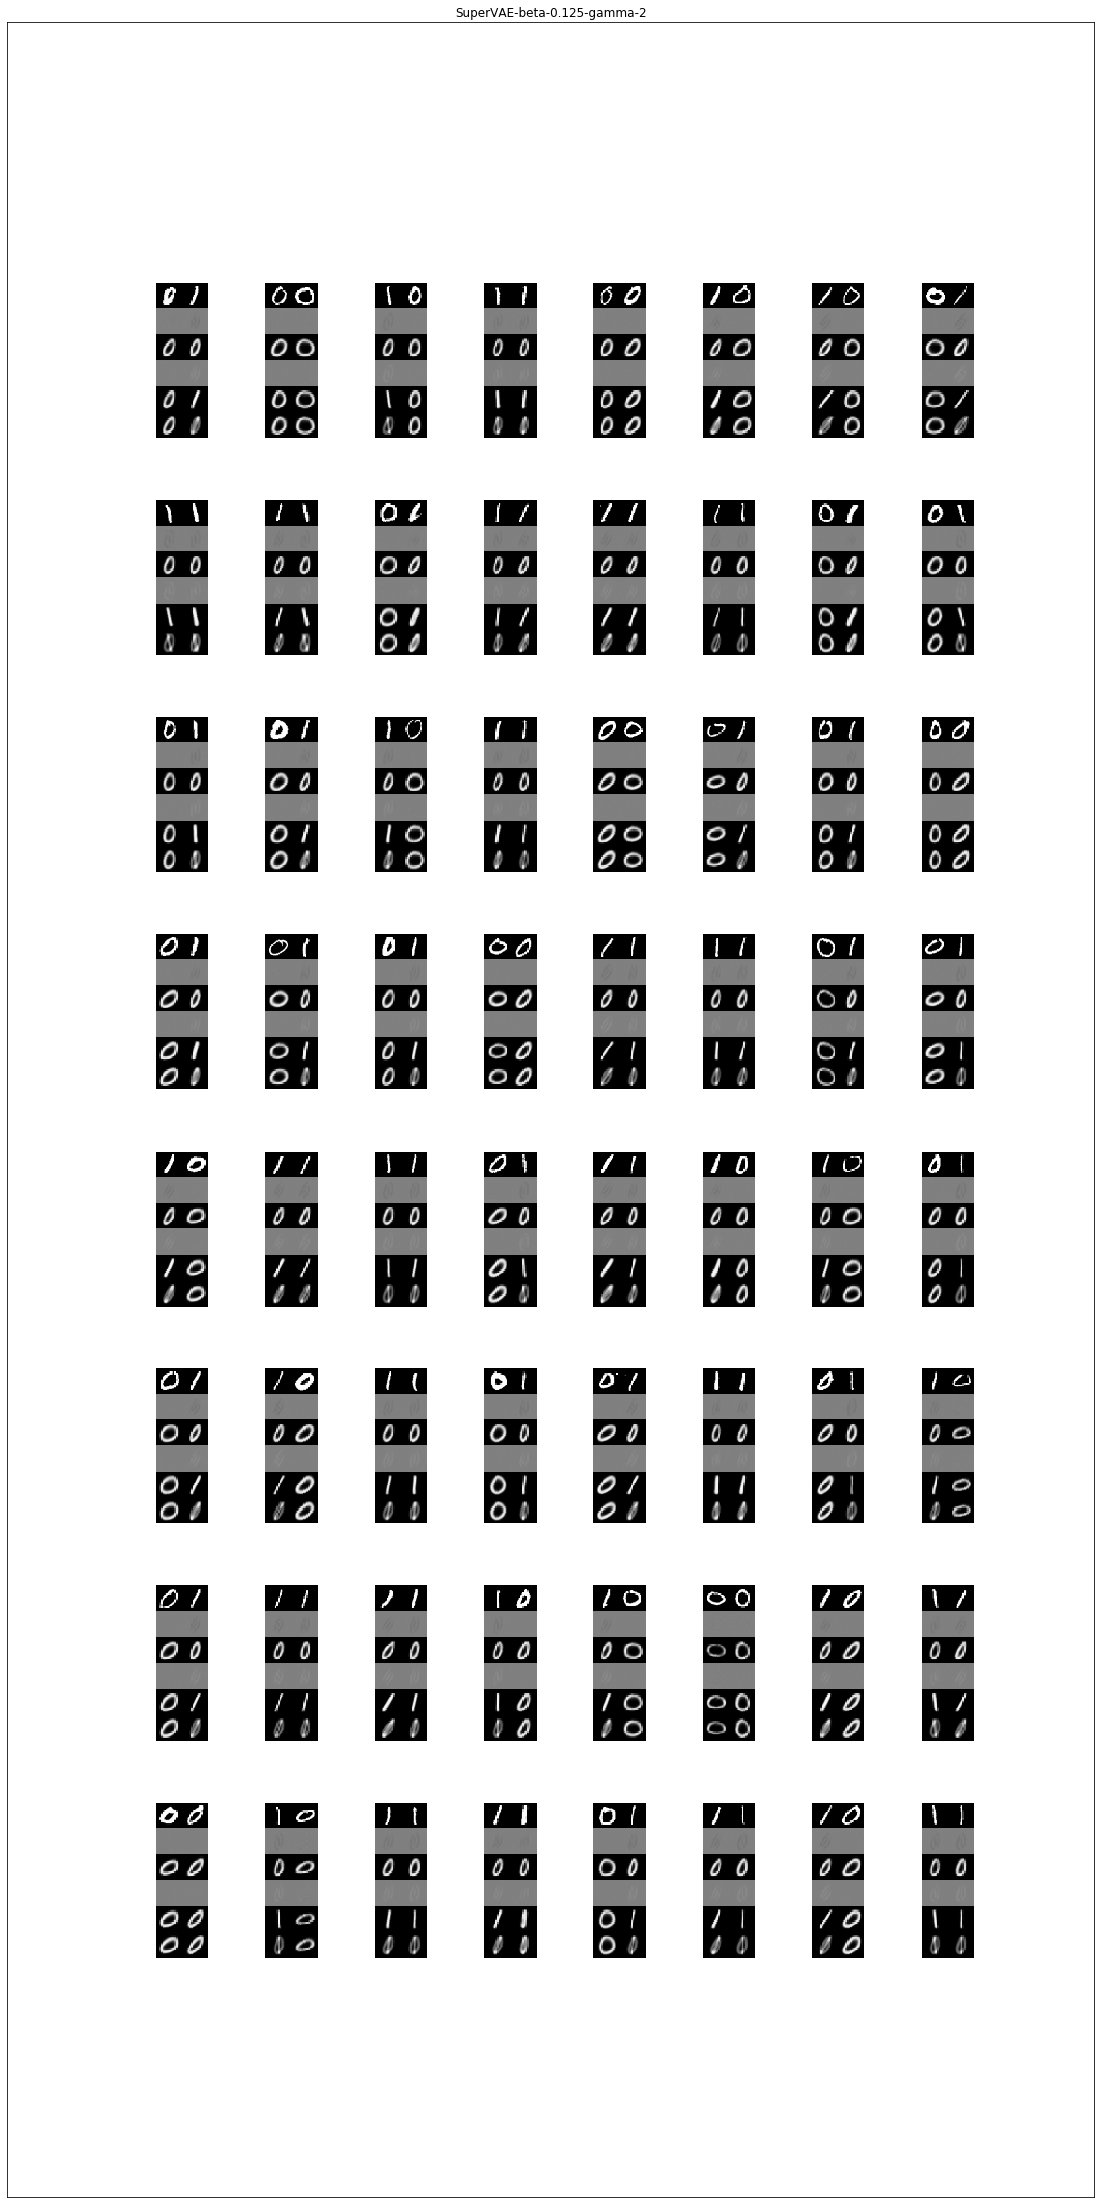

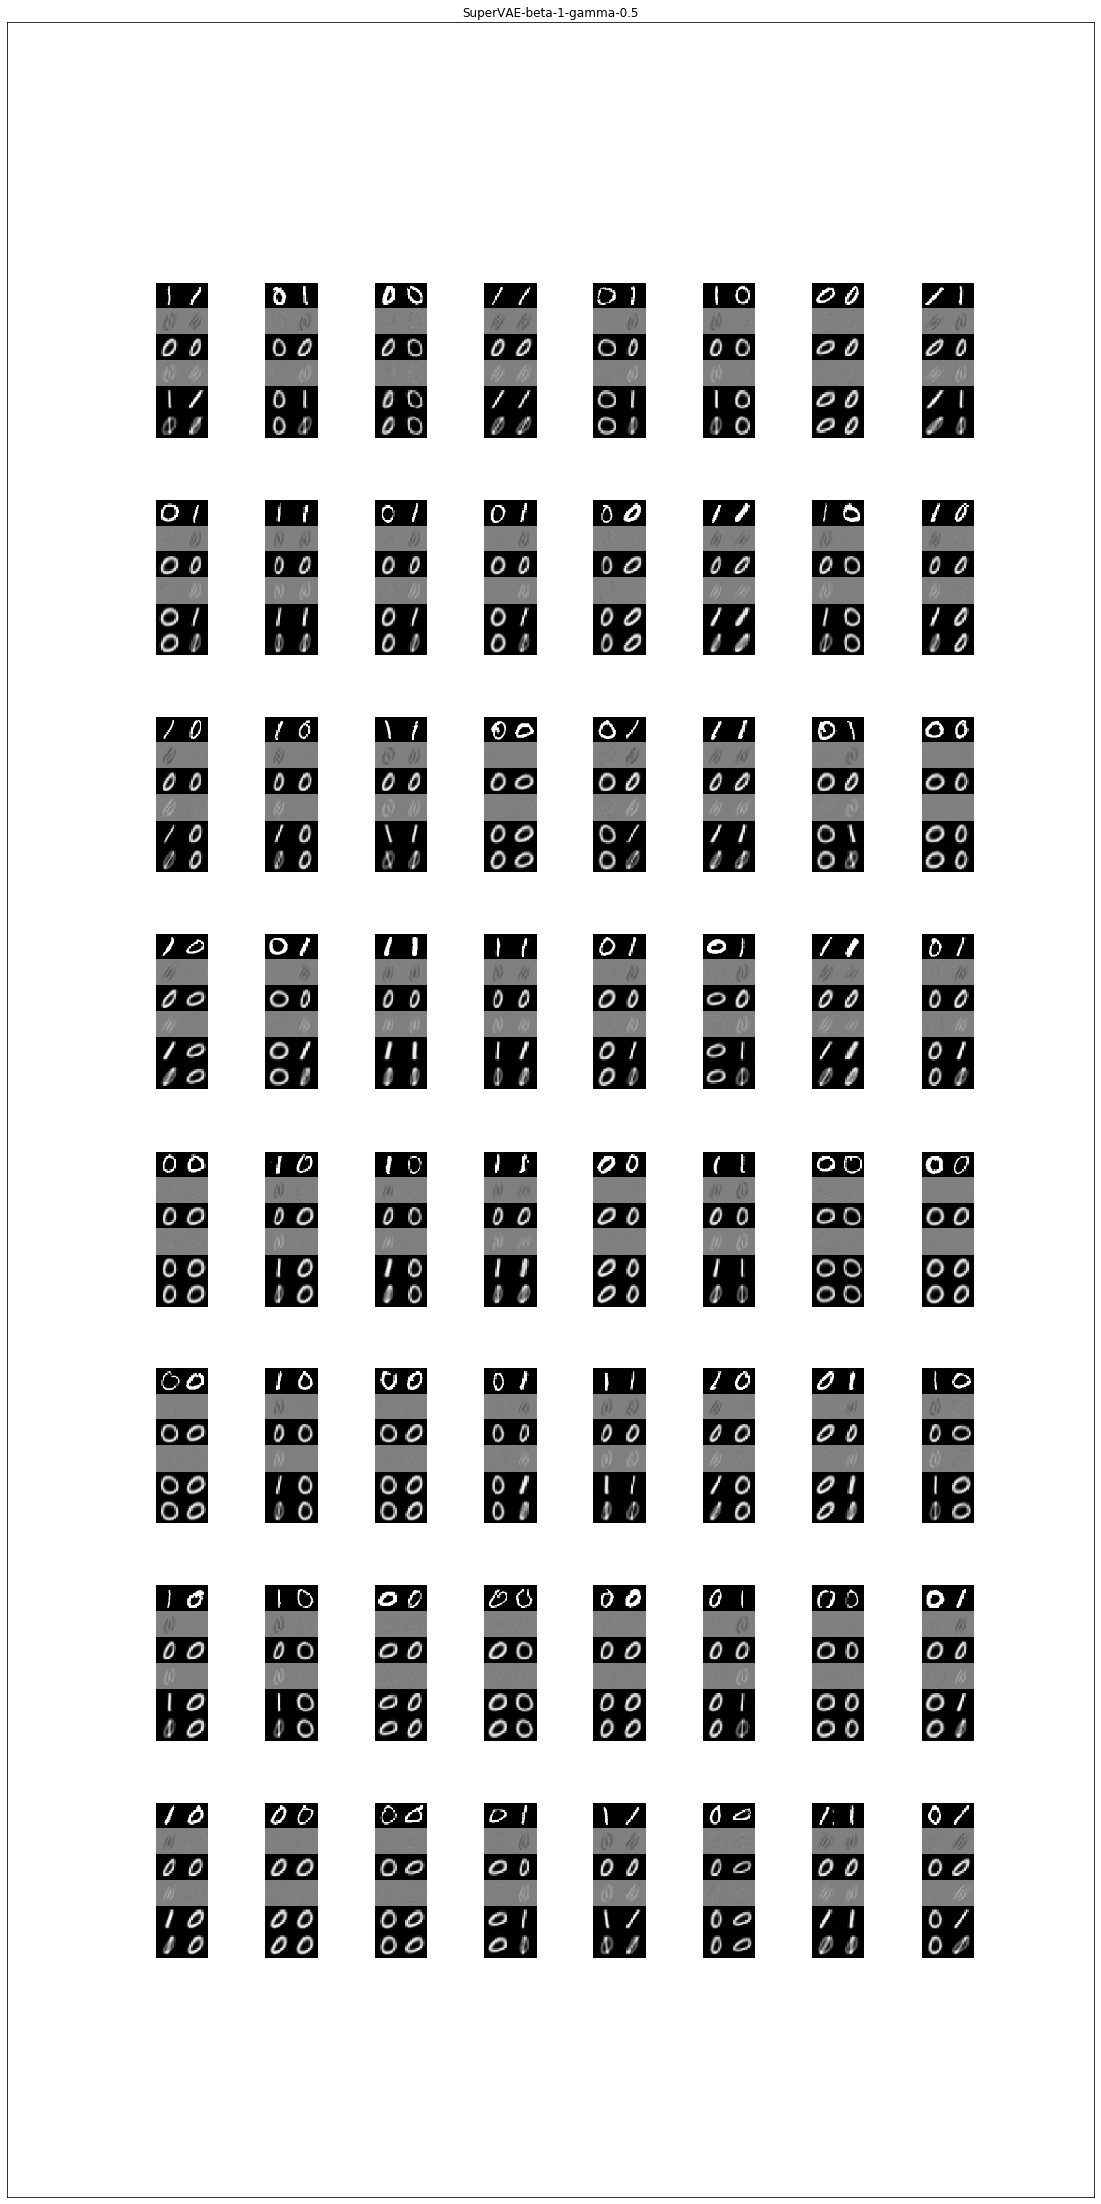

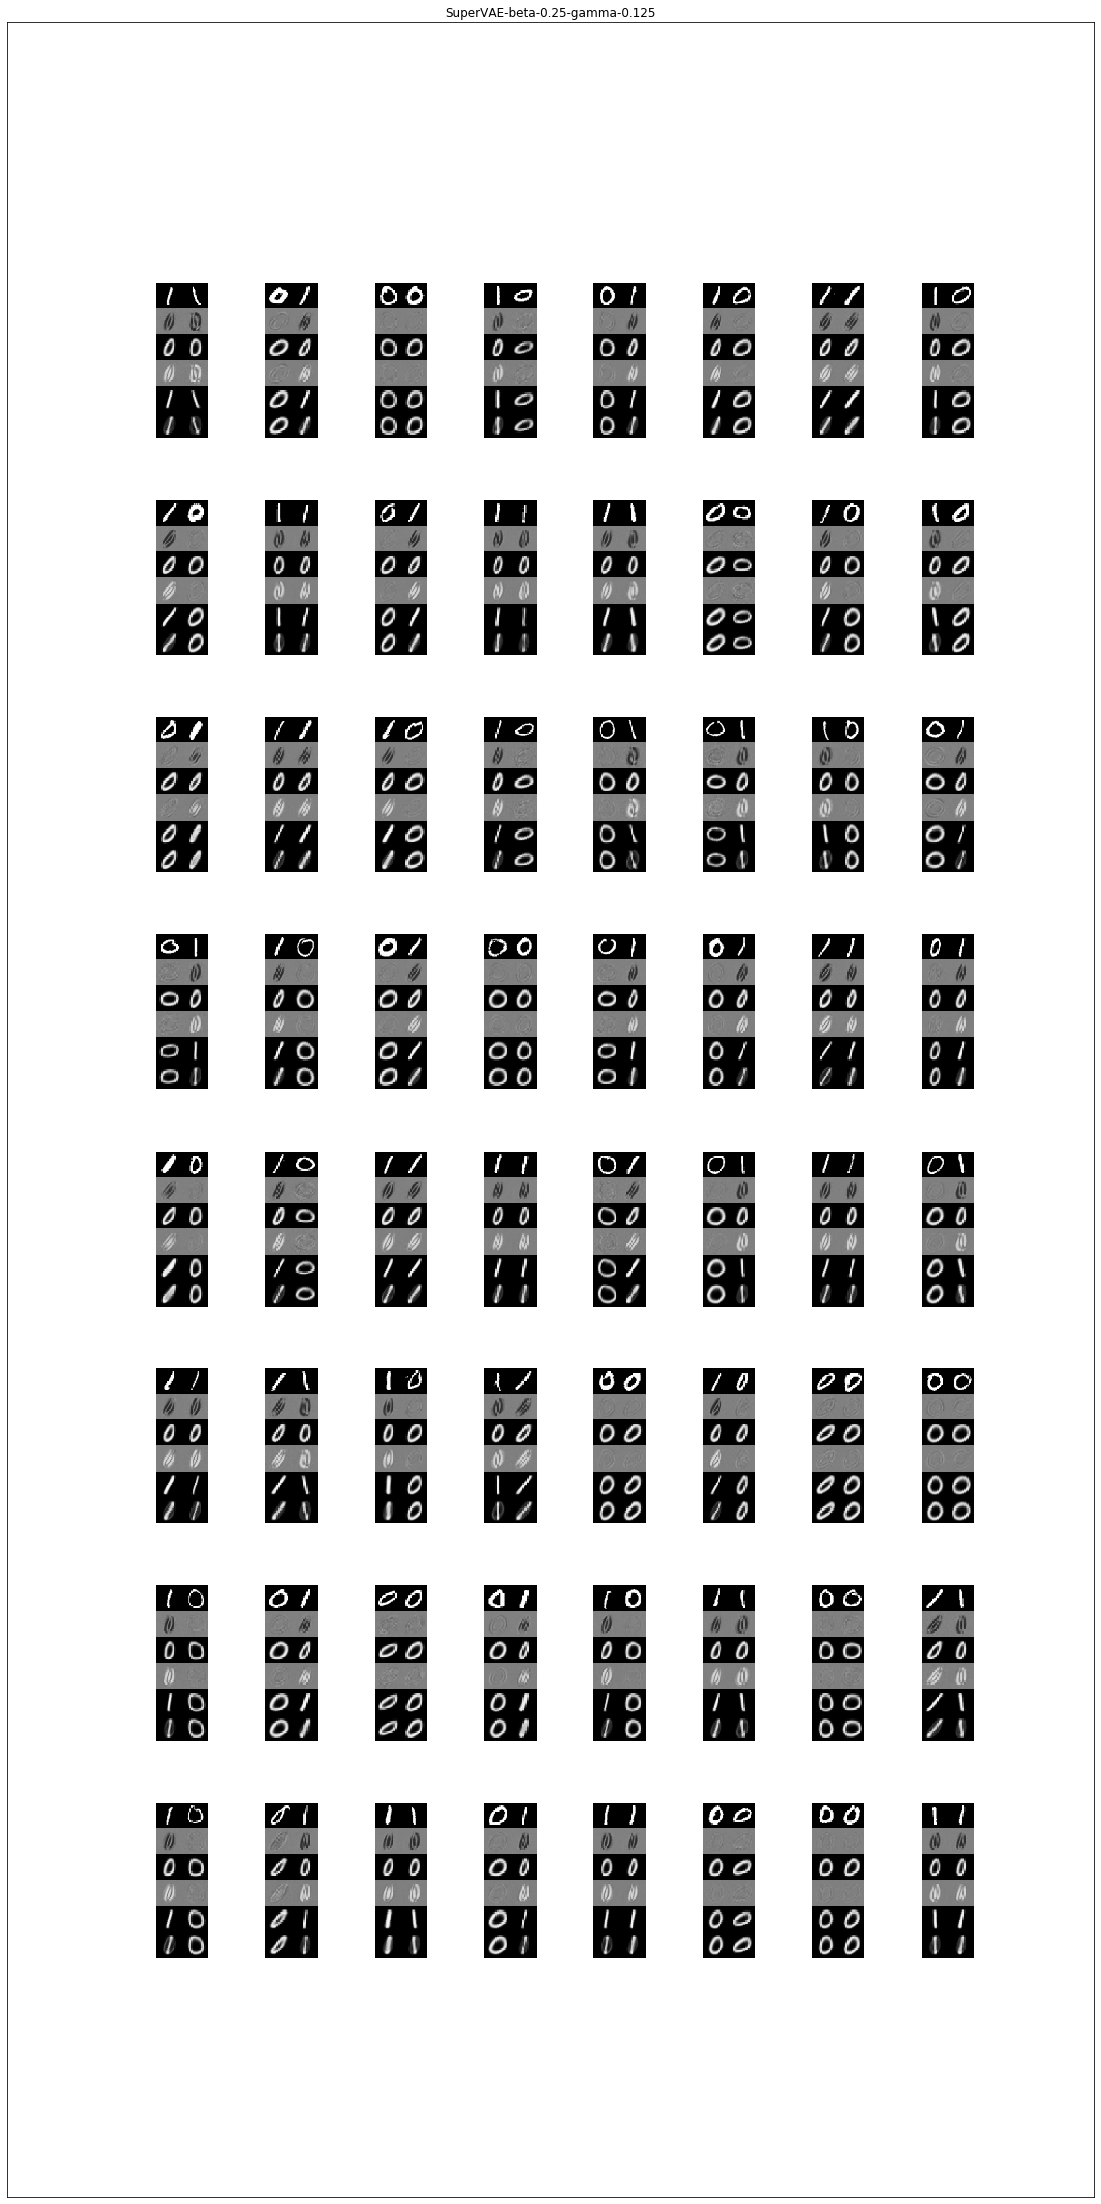

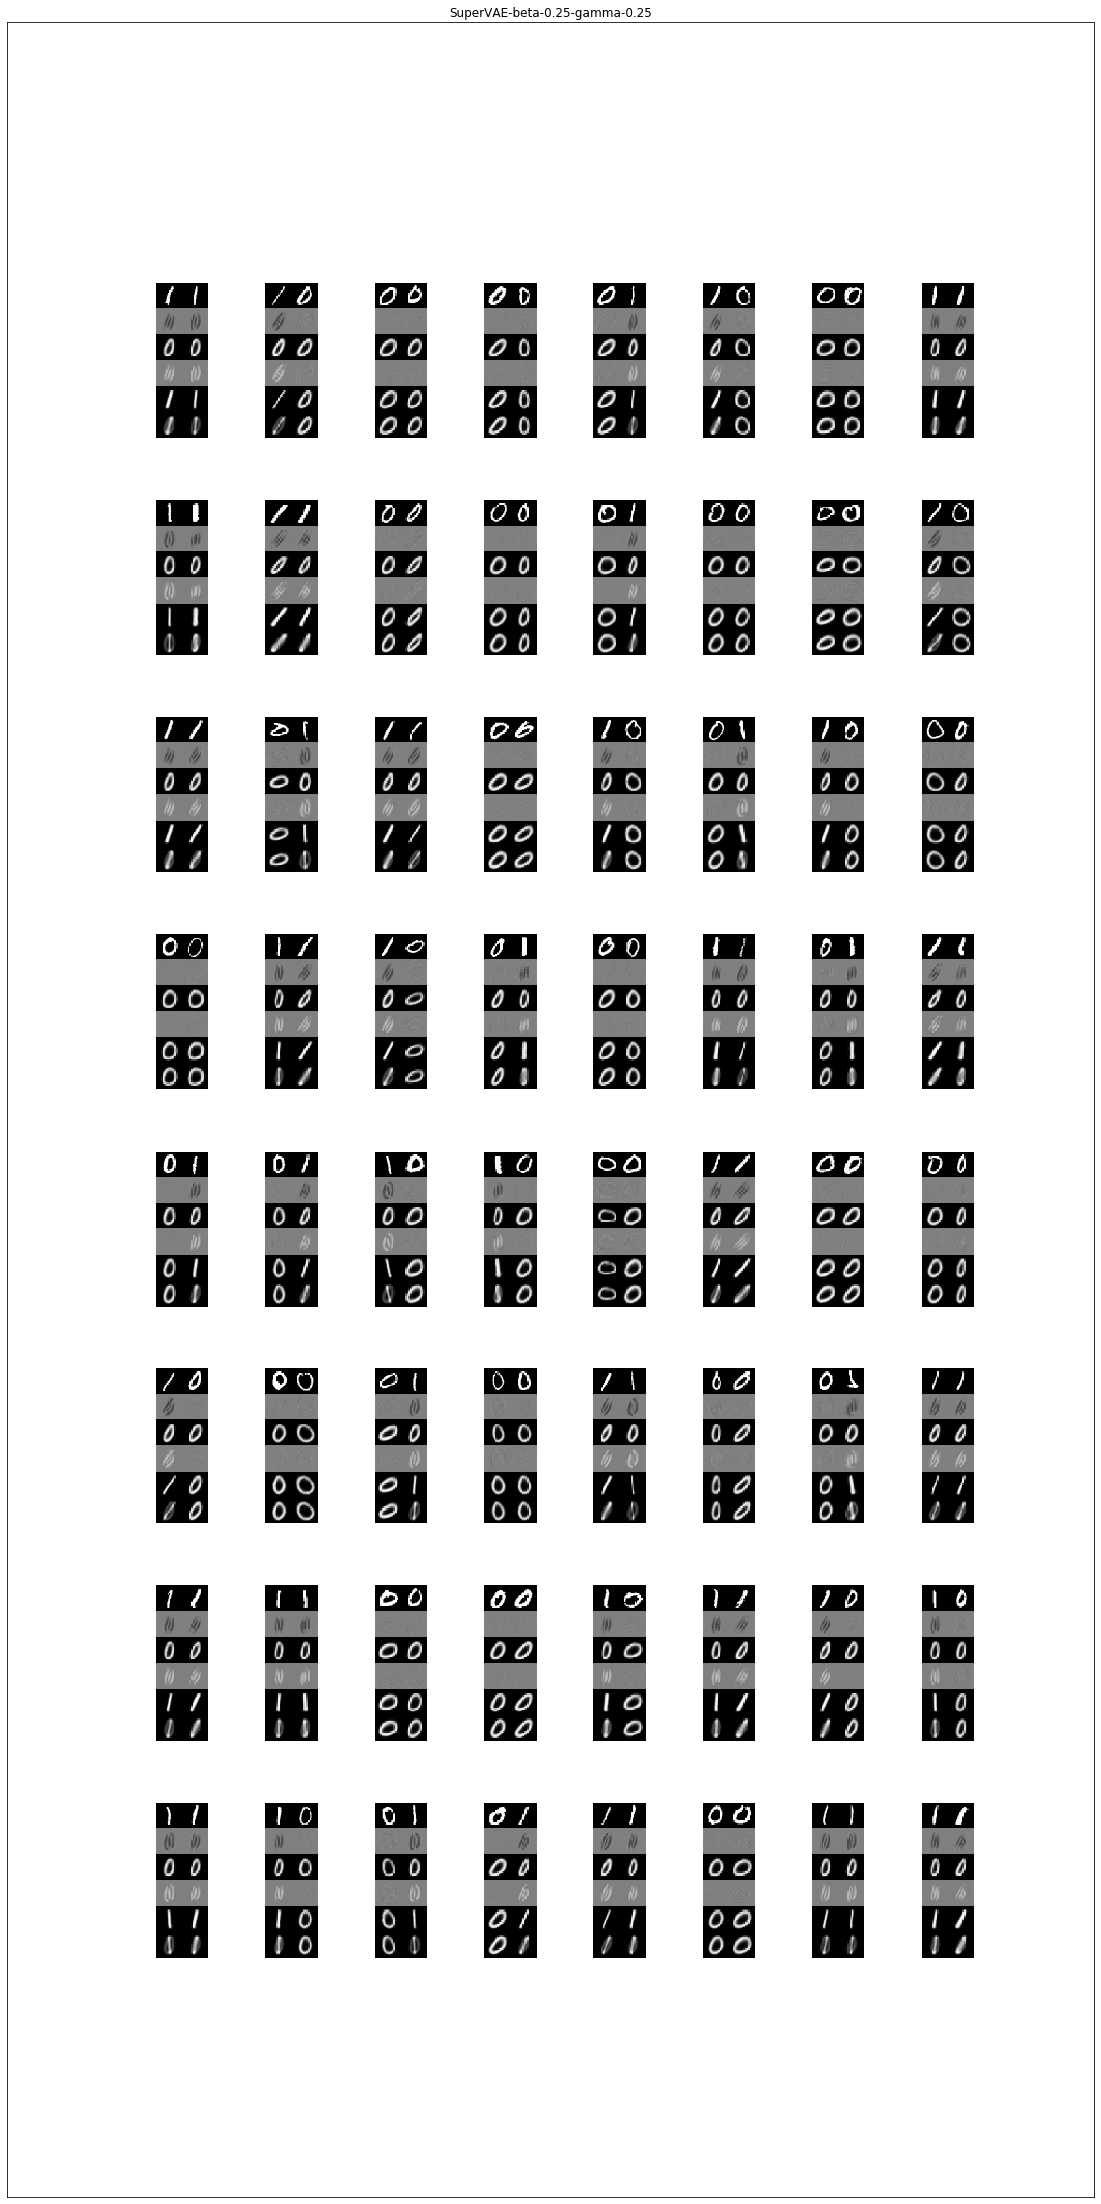

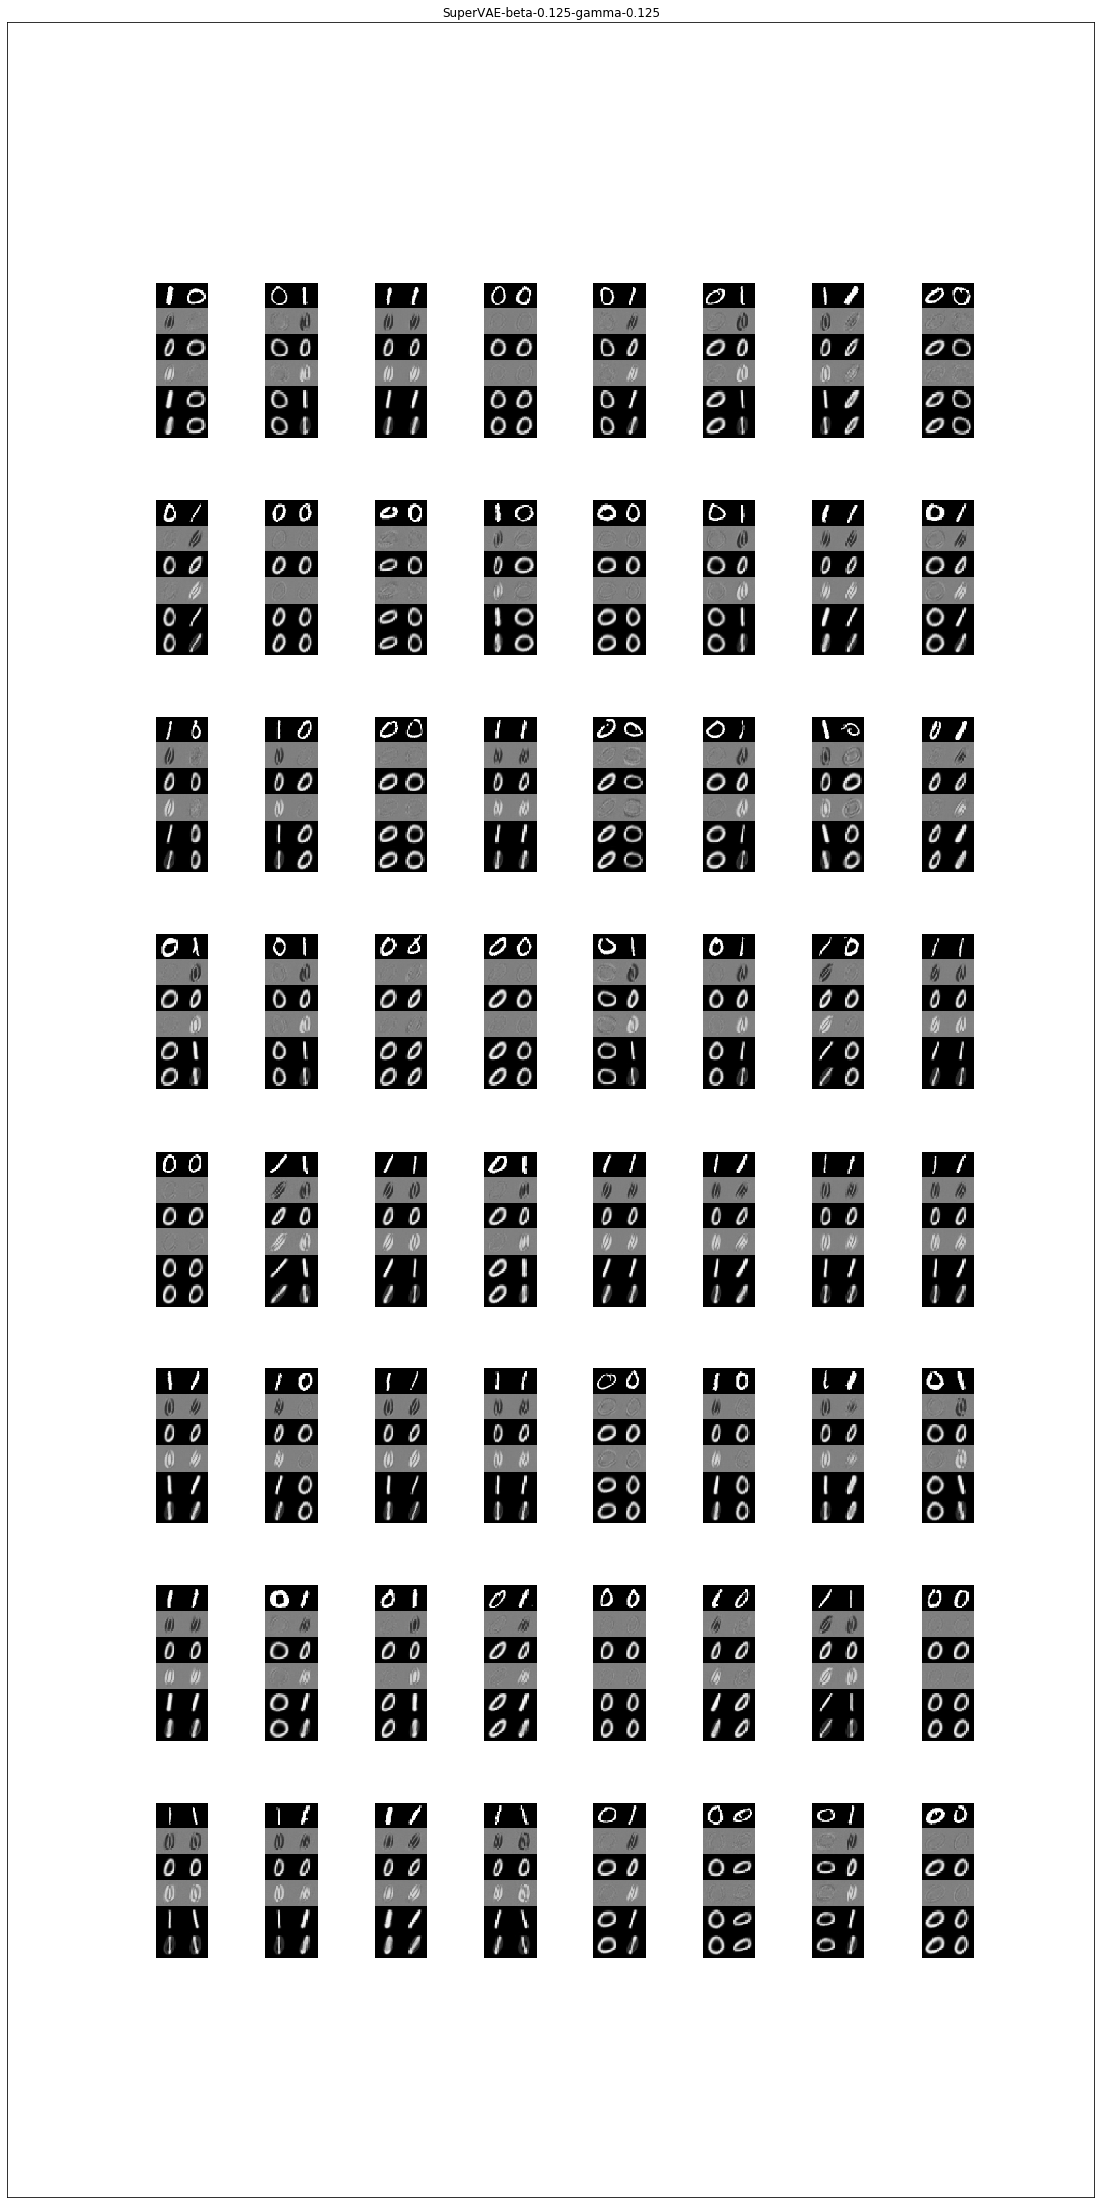

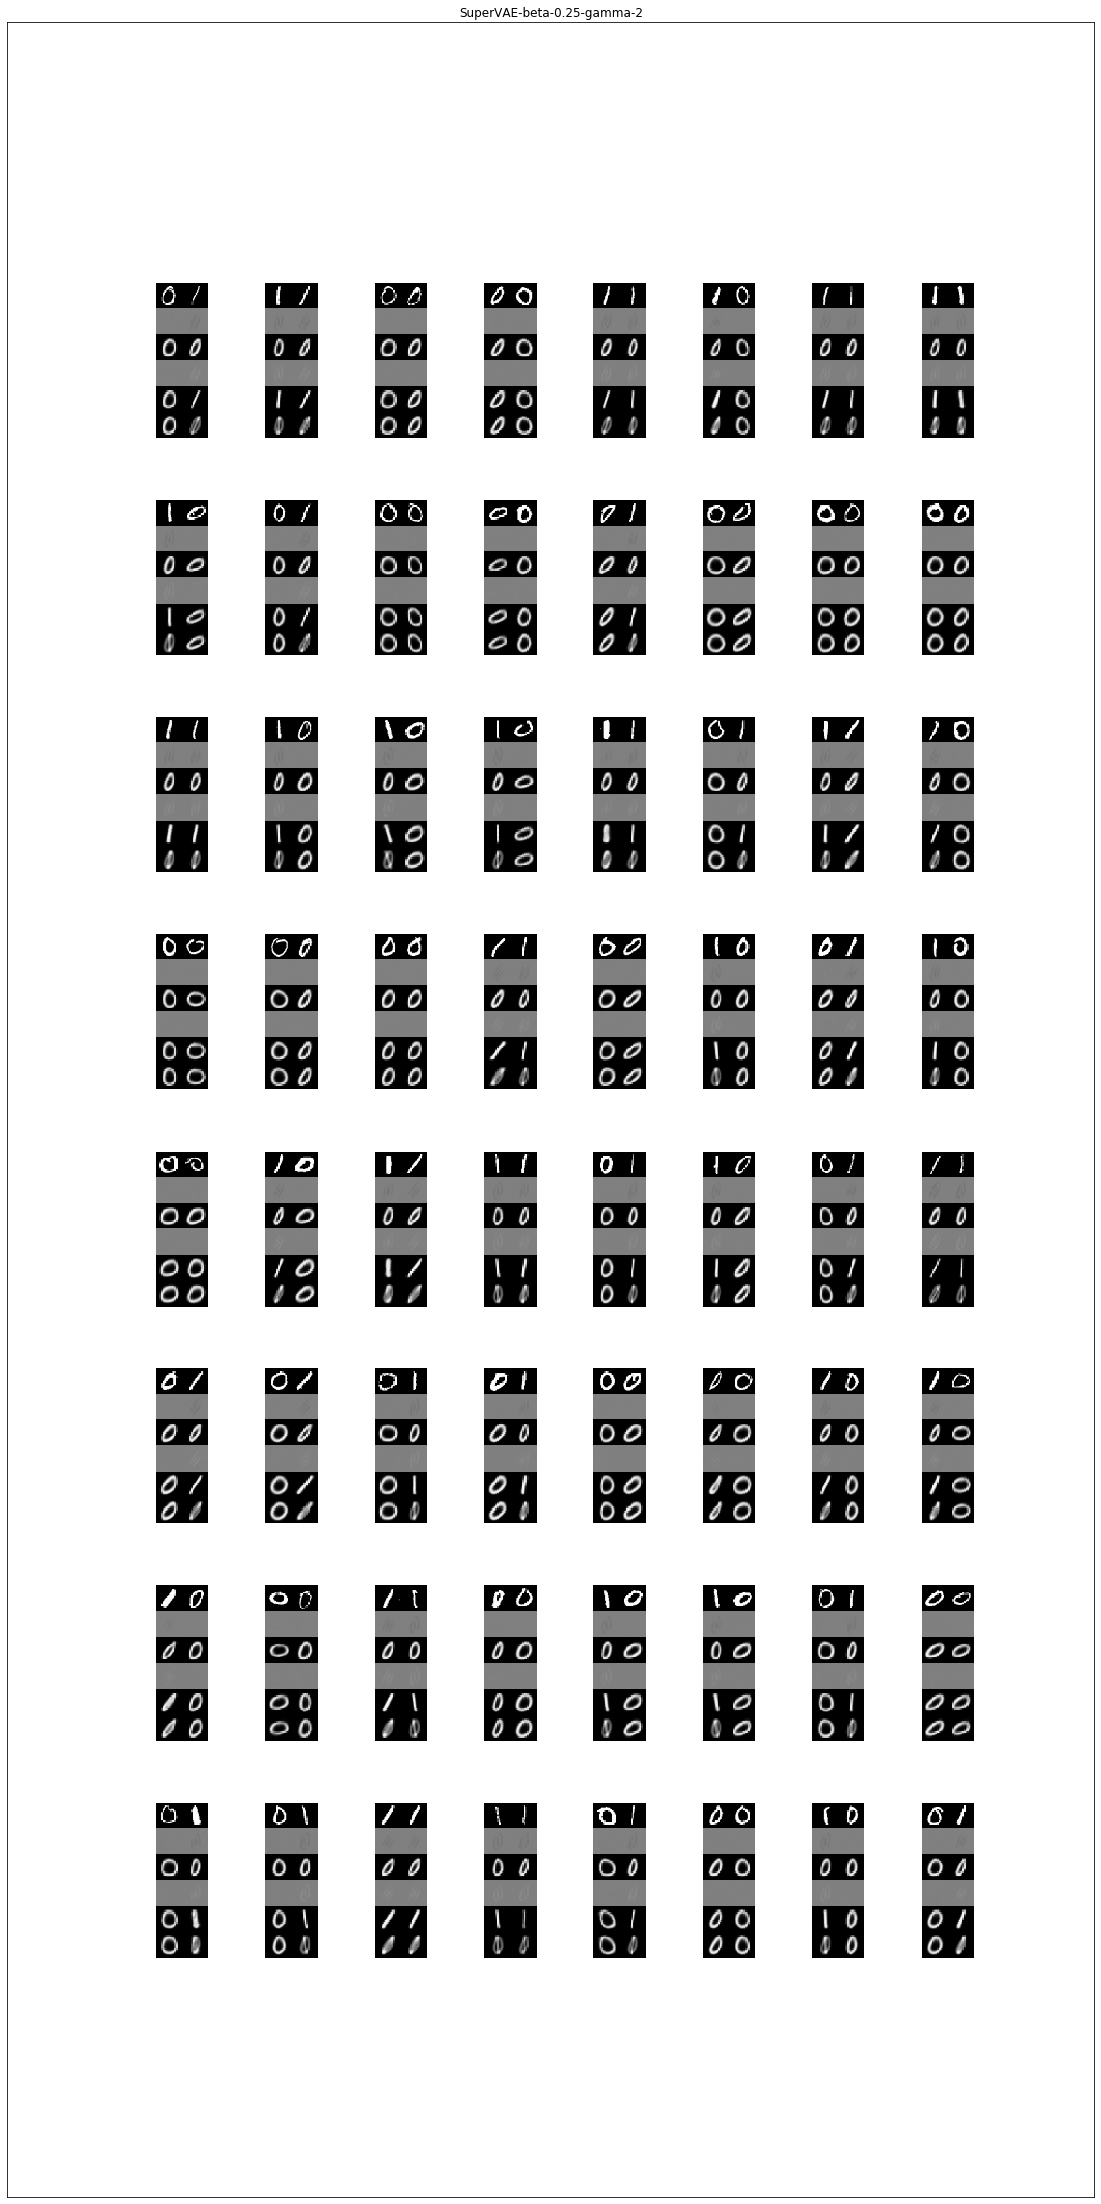

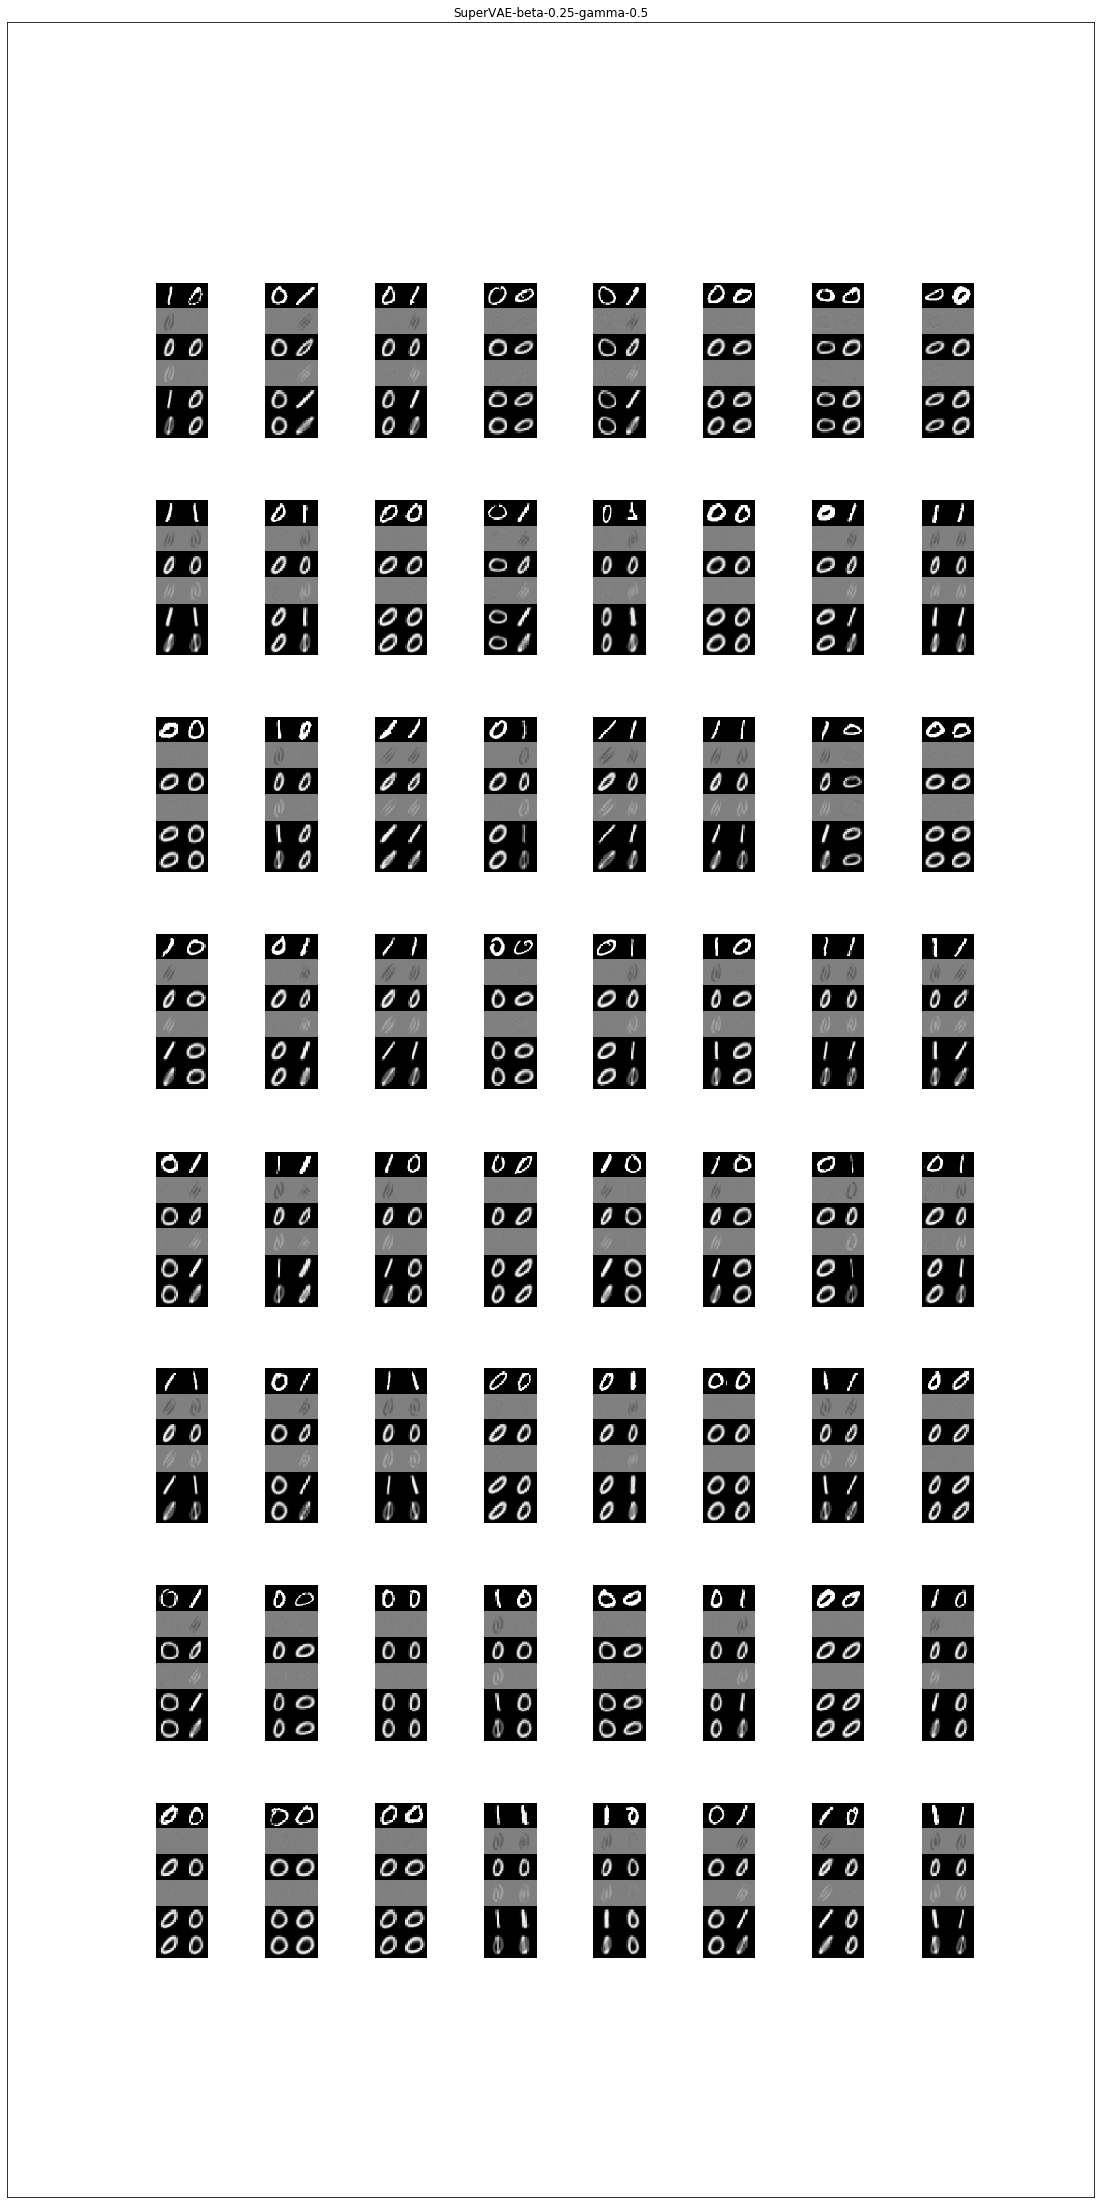

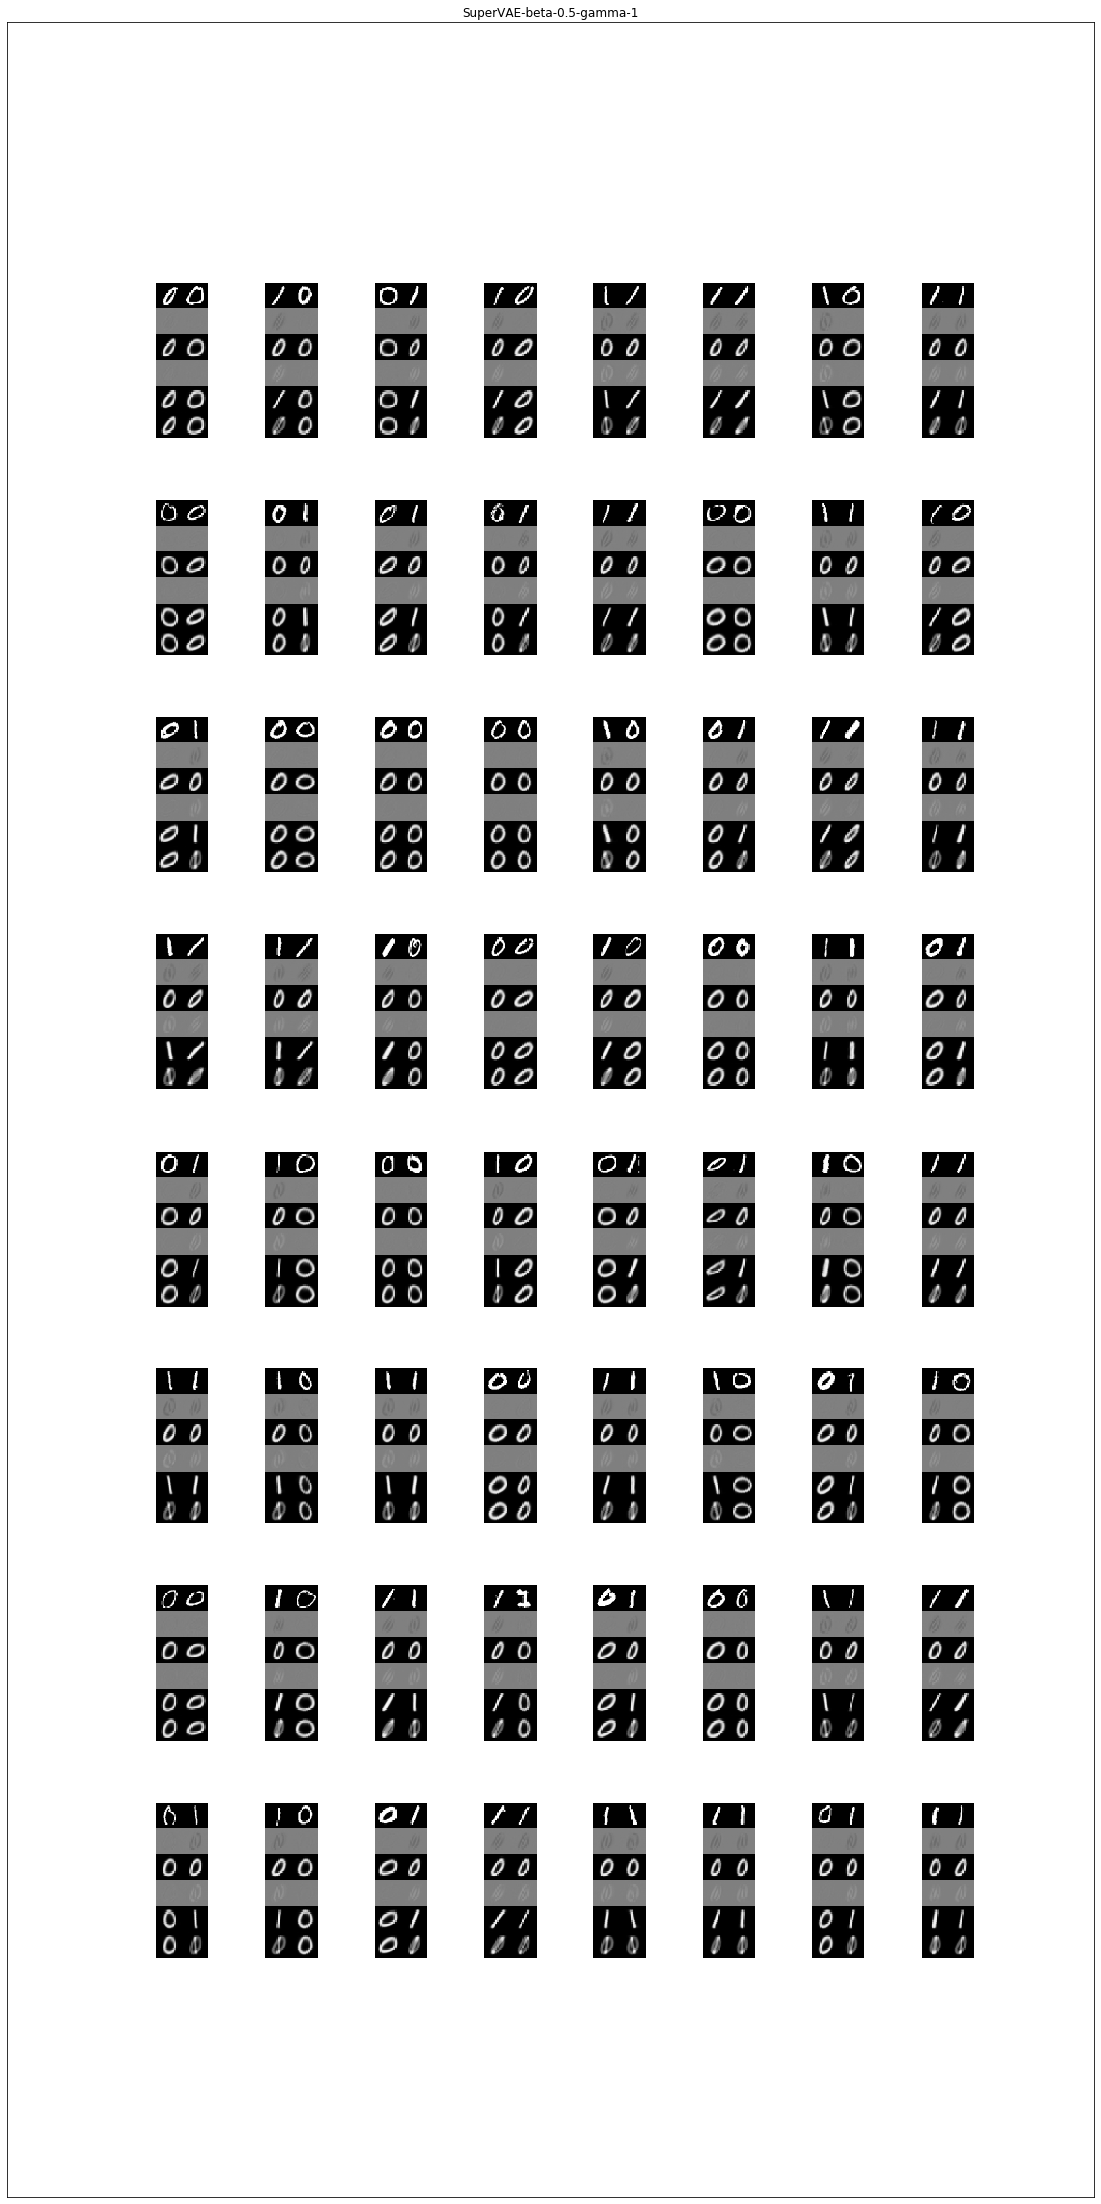

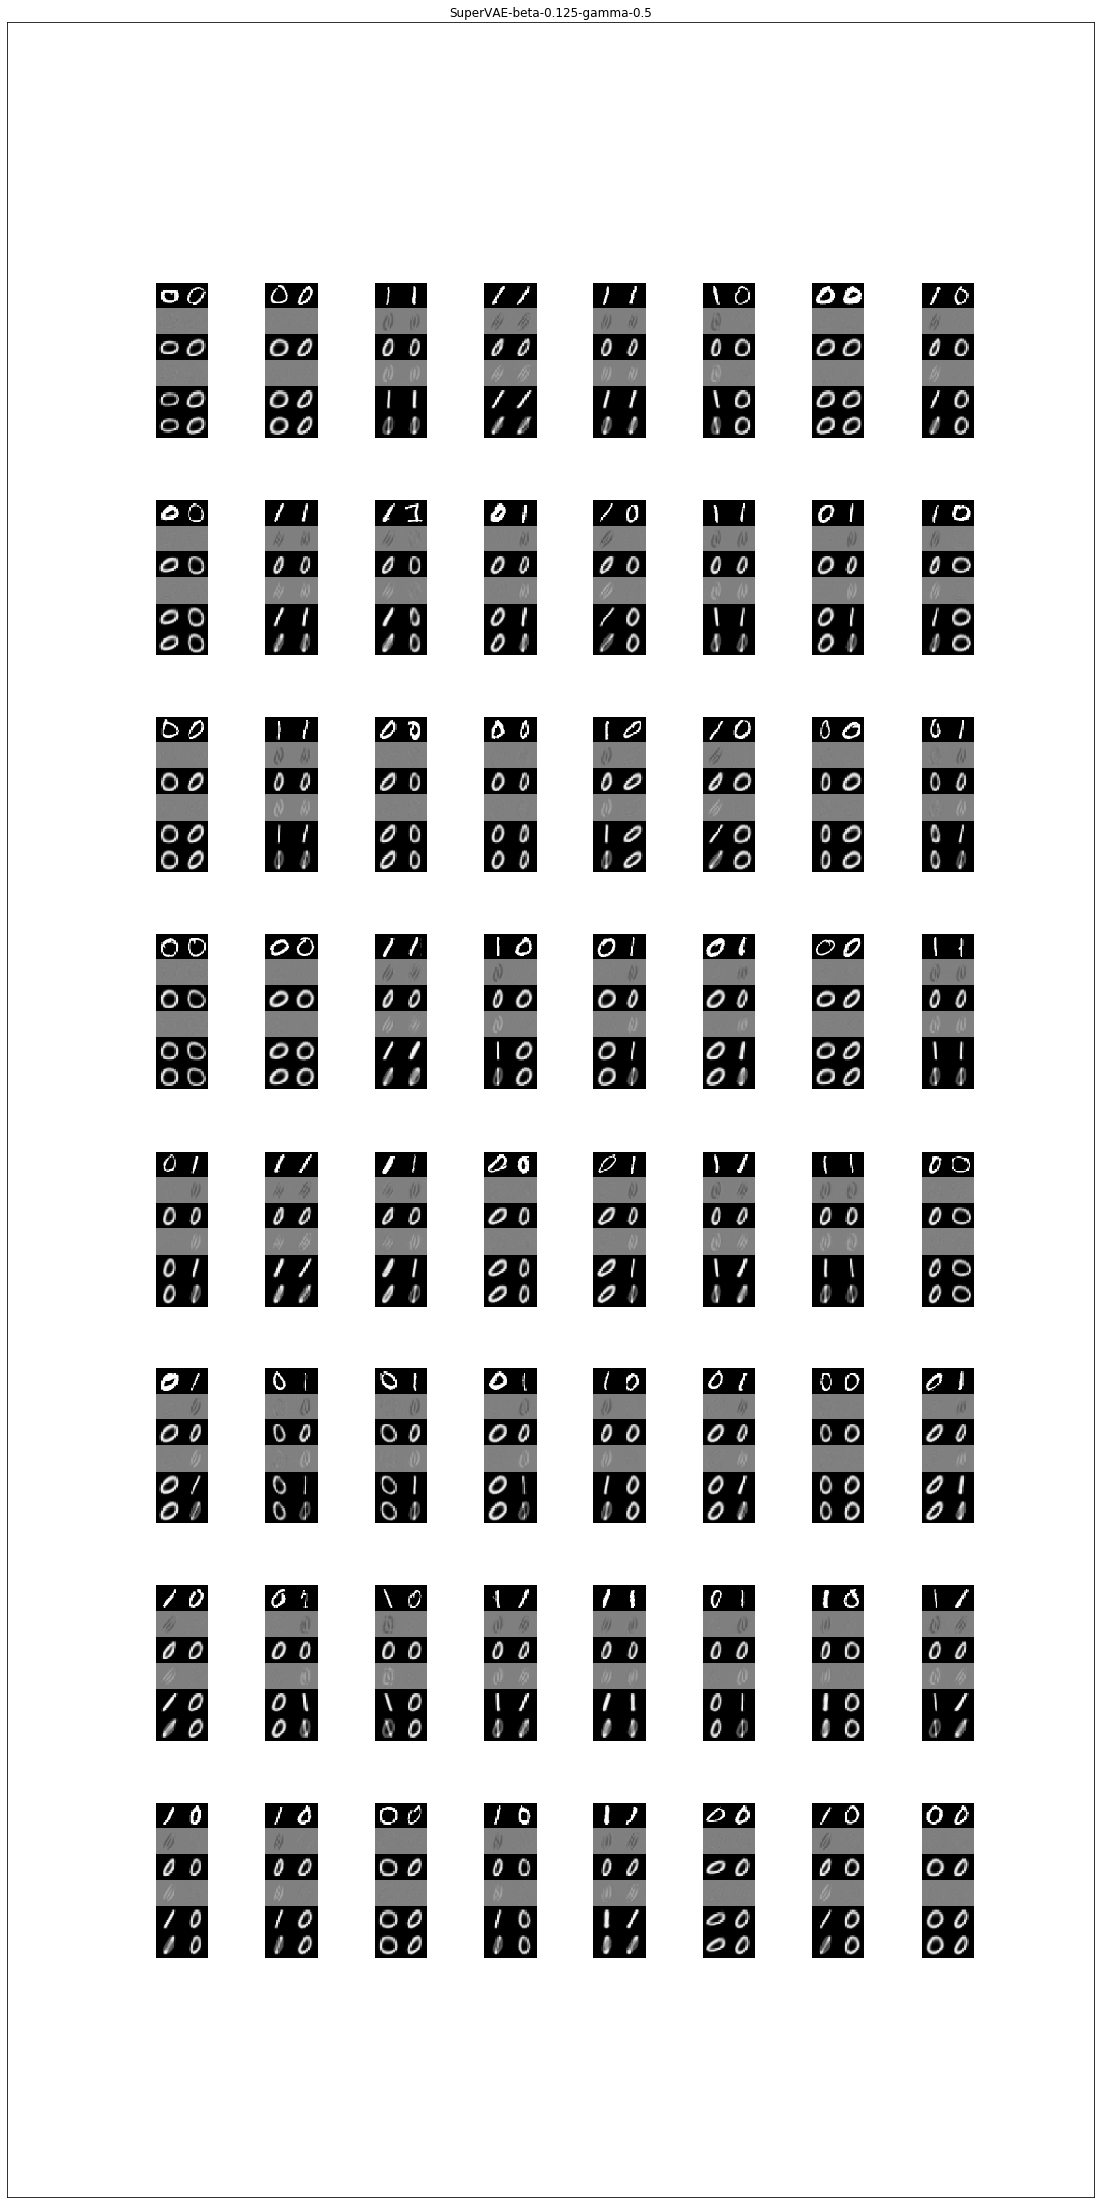

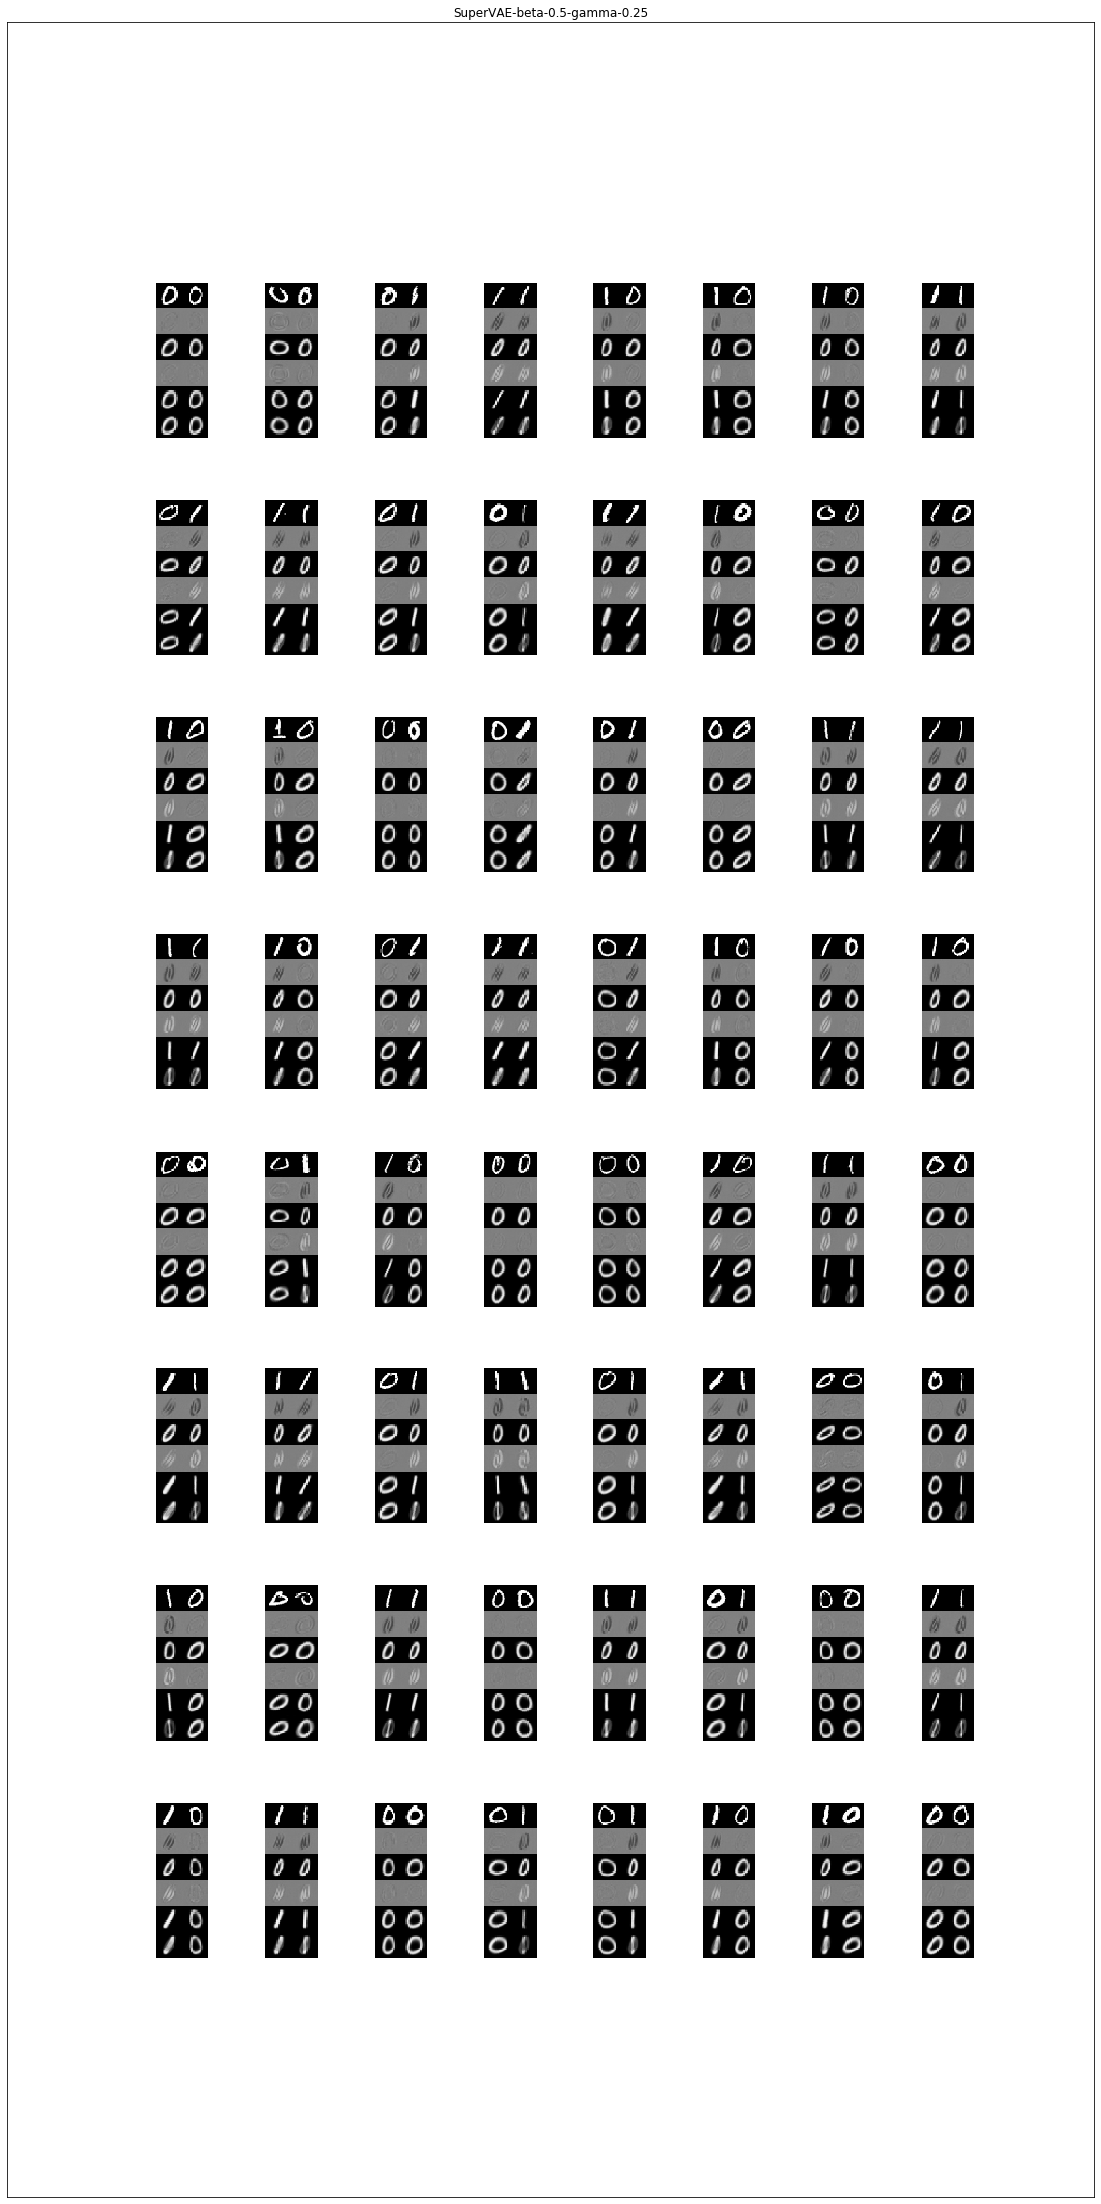

<Figure size 432x288 with 0 Axes>

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt


figsize = (20, 40)

for i_path in vae_imgs:
    img = plt.imread(str(i_path))
    
    plt.gca().axes.get_yaxis().set_visible(False)    
    plt.gca().axes.get_xaxis().set_visible(False)

    plt.gcf().set_size_inches(figsize)
    plt.imshow(img)
    plt.title(str(i_path.parent.name))
        
    plt.figure()


# plt.show()
